In [14]:
#Importing relevant functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
%matplotlib inline

In [15]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Importing the data set
!pip install xlrd
#for importing an xls file we need this package
data = pd.read_excel(r"/Users/bharatsingh/Downloads/spotify.xls")

# **Data Set Description**

This dataset contains an extensive compilation of the top songs of 2023 on spotify. It furnishes detailed information about each song, encompassing its characteristics, popularity, and its availability across different music platforms. Within this dataset there are variables such as song titles, artist names, release dates, inclusion in Spotify playlists and charts, streaming metrics, presence on Apple Music and Deezer, rankings on Shazam, and an array of audio features.

We will be analysing the dataset to find evaluate the variables and finding the best fit linear model for further analysis.

In [17]:
# Looking at the data
data.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703                  43  ...  125    B  Major   
1                 48  133716286                  48  ...   92   C#  Major   
2                113  140003974                  94  ...  138    F  Major   
3                100  800840817                 116  ...  170    A  Major   
4                 50  303236322                  84  ...  144    A  Minor   

   danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0              80         89       83             31                   0   
1              71         61       74              7                   0   
2              51         32       53             17                   0   
3              55         58       72             11                   0   
4              65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

**# Data Cleaning**

In [18]:
#Checking if there is any Null Value

print(data.isnull().values.any())

#Count the number of many missing obs per variable (if any)
print(data.isnull().sum())

True
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


Since there are Null values in two variables 'in_shazam_charts' and 'key', we will not impute the Null values as it will also remove the values from other relevant columns. Thus, instead we will be removing both the columns from the data set.

In [19]:
#Dropping columns with Null Value

data1= data.drop(['in_shazam_charts', 'key'], axis=1)
data1.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  in_deezer_charts  \
0                147  141381703                  43  ...                10   
1                 48  133716286                  48  ...                14   
2                113  140003974                  94  ...                14   
3                100  800840817                 116  ...                12   
4                 50  303236322                  84  ...                15   

   bpm   mode  danceability_% valence_%  energy_%  acousticness_%  \
0  125  Major              80        89        83              31   
1   92  Major              71        61        74               7   
2  138  Major              51        32        53              17   
3  170  Major              55        58        72              11   
4  144  Minor              65        23        80              14   

   instrumentalness_%  liveness_%  speechiness_%  
0                   0           8              4  
1                   0          10              4  
2                   0          31              6  
3                   0          11             15  
4                  63          11              6  

[5 rows x 22 columns]

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  bpm                   952 non-null    int64 
 14  mode                  952 non-null    object
 15  danceability_%        952 non-null    in

In [21]:
data1['binary_mode'] = data1['mode'].apply(lambda x: 1 if x == 'Major' else 0)

In [22]:
# The 'binary_mode' column now contains 1s and 0s
print(data1)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
947                         My Mind & Me        Selena Gomez             1   
948            Bigger Than The Whole Sky        Taylor Swift             1   
949                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
950                        En La De Ella  Feid, Sech, Jhayco             3   
951                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  bpm                   952 non-null    int64 
 14  mode                  952 non-null    object
 15  danceability_%        952 non-null    in

Created another column 'binary_mode' so that mode takes integer values of 1 if Major and 0 if Minor.

In [24]:
#Removing Null value

data2 = data1.dropna(axis=1)

In [25]:
print(data2.isnull().values.any())

False


Thus, NA values in the data set have been removed.

In [26]:
#Cleaning data part 2: #Filtering the data for only 2023 data

data3 = data2[data2['released_year'] == 2023]

In [27]:
#Checking the number of rows and colums in the filtered data

data3.shape

(175, 23)

**# Descriptive Analysis of the data**

In [28]:
#Part 1: Summary Statistics

data3.describe()

artist_count  released_year  released_month  released_day  \
count    175.000000          175.0      175.000000    175.000000   
mean       1.771429         2023.0        3.971429     15.028571   
std        0.979259            0.0        1.830233      9.546877   
min        1.000000         2023.0        1.000000      1.000000   
25%        1.000000         2023.0        3.000000      6.500000   
50%        2.000000         2023.0        4.000000     15.000000   
75%        2.000000         2023.0        6.000000     24.000000   
max        8.000000         2023.0        7.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            175.000000         175.000000  1.750000e+02   
mean            1134.594286          24.091429  1.474771e+08   
std             1359.241088          26.819591  1.542564e+08   
min               34.000000           0.000000  1.159939e+07   
25%              350.000000           4.000000  5.962073e+07   
50%              681.000000          15.000000  1.077538e+08   
75%             1355.000000          37.000000  1.642359e+08   
max            12211.000000         147.000000  1.316856e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          175.000000       175.000000           175.000000   
mean            32.342857        69.731429            40.702857   
std             37.455370        59.119613            69.706056   
min              0.000000         0.000000             0.000000   
25%              8.000000        15.500000             7.500000   
50%             19.000000        64.000000            23.000000   
75%             43.000000       105.500000            49.500000   
max            300.000000       263.000000           745.000000   

       in_deezer_charts         bpm  danceability_%   valence_%    energy_%  \
count        175.000000  175.000000      175.000000  175.000000  175.000000   
mean           4.314286  124.062857       70.022857   55.080000   68.222857   
std            7.320933   25.752392       11.793703   23.784821   15.050167   
min            0.000000   67.000000       43.000000    5.000000    9.000000   
25%            0.000000  104.000000       62.000000   36.000000   59.000000   
50%            1.000000  124.000000       71.000000   56.000000   70.000000   
75%            5.500000  140.000000       79.000000   74.500000   79.000000   
max           58.000000  204.000000       93.000000   96.000000   96.000000   

       acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
count      175.000000          175.000000  175.000000     175.000000   
mean        25.251429            1.205714   19.742857       9.297143   
std         22.951090            7.232825   14.280730       9.584635   
min          0.000000            0.000000    3.000000       3.000000   
25%          7.000000            0.000000   10.000000       4.000000   
50%         18.000000            0.000000   12.000000       5.000000   
75%         38.500000            0.000000   27.000000       9.000000   
max         96.000000           63.000000   91.000000      64.000000   

       binary_mode  
count   175.000000  
mean      0.508571  
std       0.501361  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

Analysis of Summary Statistics of data:

1.in_spotify_playlist has a much higher mean than other variables in the data. The maximum value of the variable is 12211 and can cause biased results while running an overall regression.

2.artist_count: This variable has a count of 175. The minimum count is 1, and the maximum count is 8, with a mean of approximately 1.77. This suggests that the majority of observations have a low artist count, with some exceptions having a higher count.

3.released_year: All observations have the same year i.e. 2023 indicating that the data is for one year only.

4.Streams has a much bigger value than other variables which might cause problems while running a regression.    

array([[<Axes: title={'center': 'artist_count'}>,
        <Axes: title={'center': 'released_year'}>,
        <Axes: title={'center': 'released_month'}>,
        <Axes: title={'center': 'released_day'}>],
       [<Axes: title={'center': 'in_spotify_playlists'}>,
        <Axes: title={'center': 'in_spotify_charts'}>,
        <Axes: title={'center': 'streams'}>,
        <Axes: title={'center': 'in_apple_playlists'}>],
       [<Axes: title={'center': 'in_apple_charts'}>,
        <Axes: title={'center': 'in_deezer_playlists'}>,
        <Axes: title={'center': 'in_deezer_charts'}>,
        <Axes: title={'center': 'bpm'}>],
       [<Axes: title={'center': 'danceability_%'}>,
        <Axes: title={'center': 'valence_%'}>,
        <Axes: title={'center': 'energy_%'}>,
        <Axes: title={'center': 'acousticness_%'}>],
       [<Axes: title={'center': 'instrumentalness_%'}>,
        <Axes: title={'center': 'liveness_%'}>,
        <Axes: title={'center': 'speechiness_%'}>,
        <Axes: title={

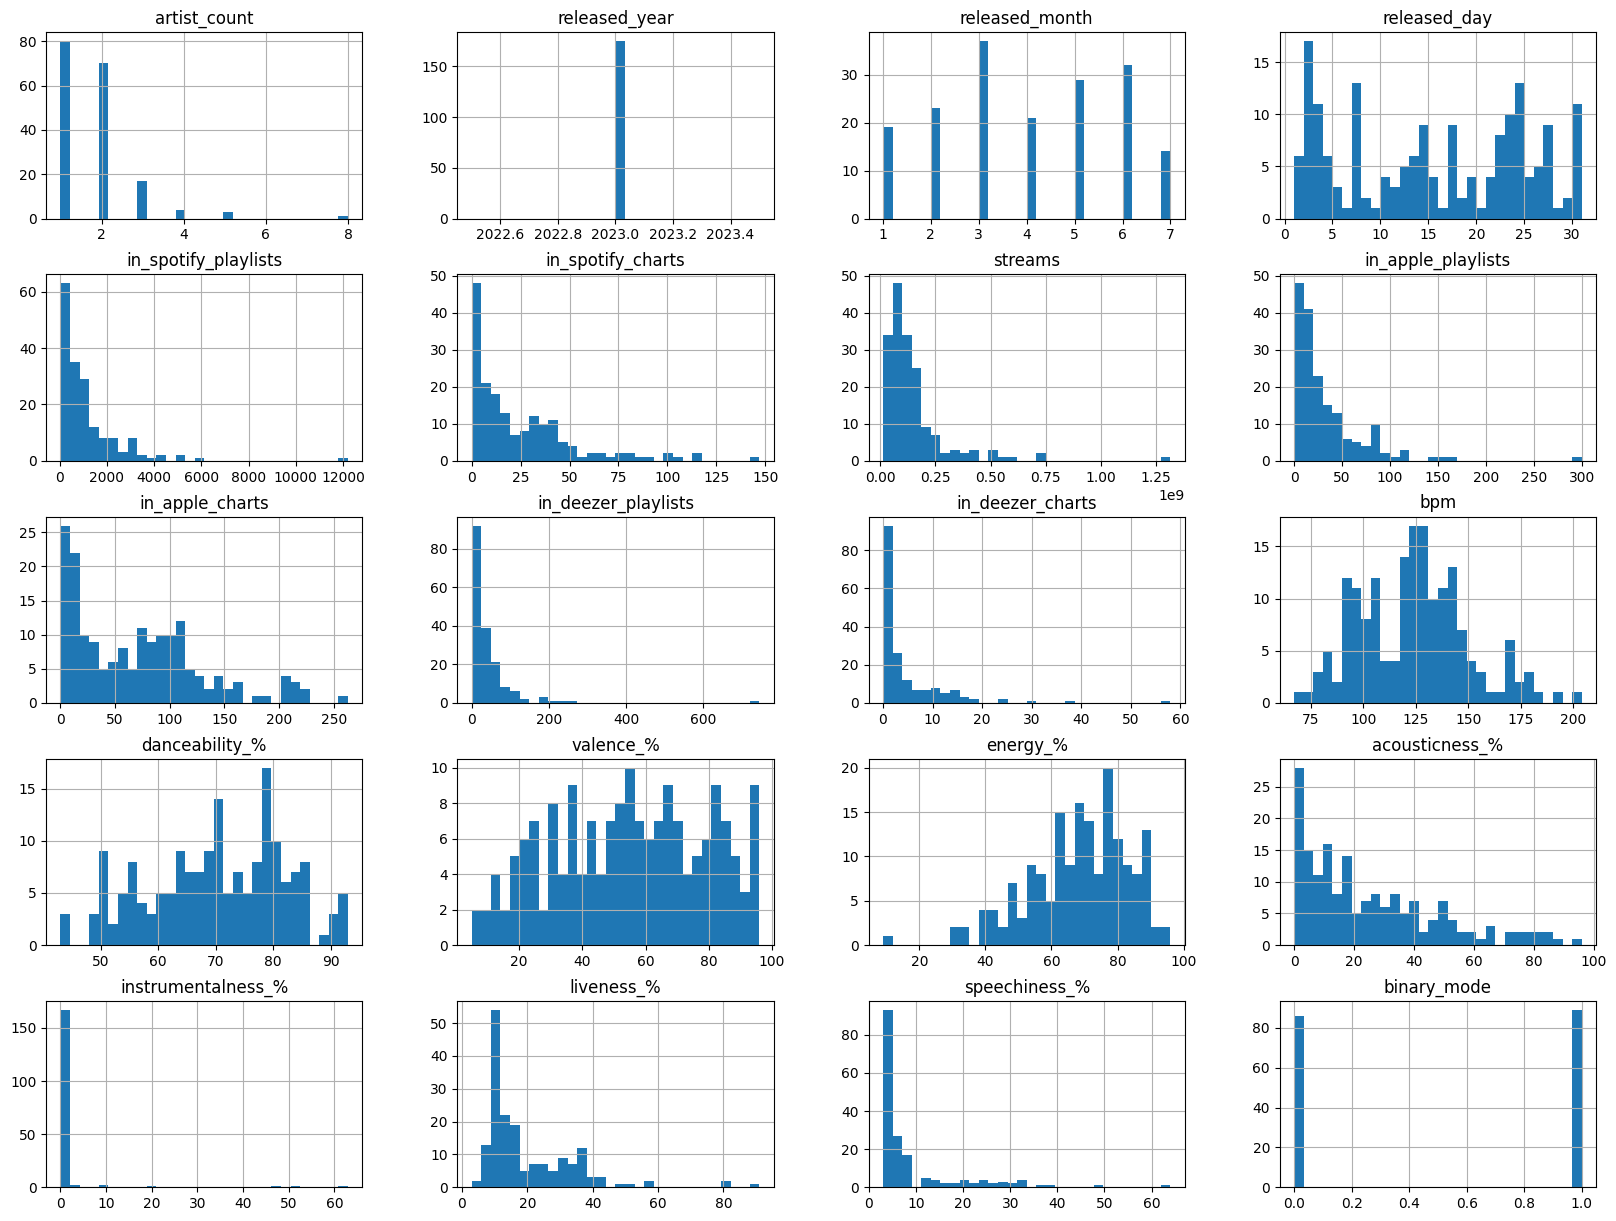

In [29]:
#Part 2: Plotting Histograms

data3.hist(bins=30, figsize=(20, 15))

Analysis of the data through Histograms:

1.Most of the variables show skewness and have a long tail towards right.

  Variable that show Positively skewness are:in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_deezer_playlists, in_deezer_charts', speechiness_%, acousticness_%
  
  Variables that show Negatively skewness are: energy_%
  
2.Outliers can also be observed in various variables such as in_spotify_playlists, in_spotify_charts, streams, etc.

IndexError: index 16 is out of bounds for axis 0 with size 16

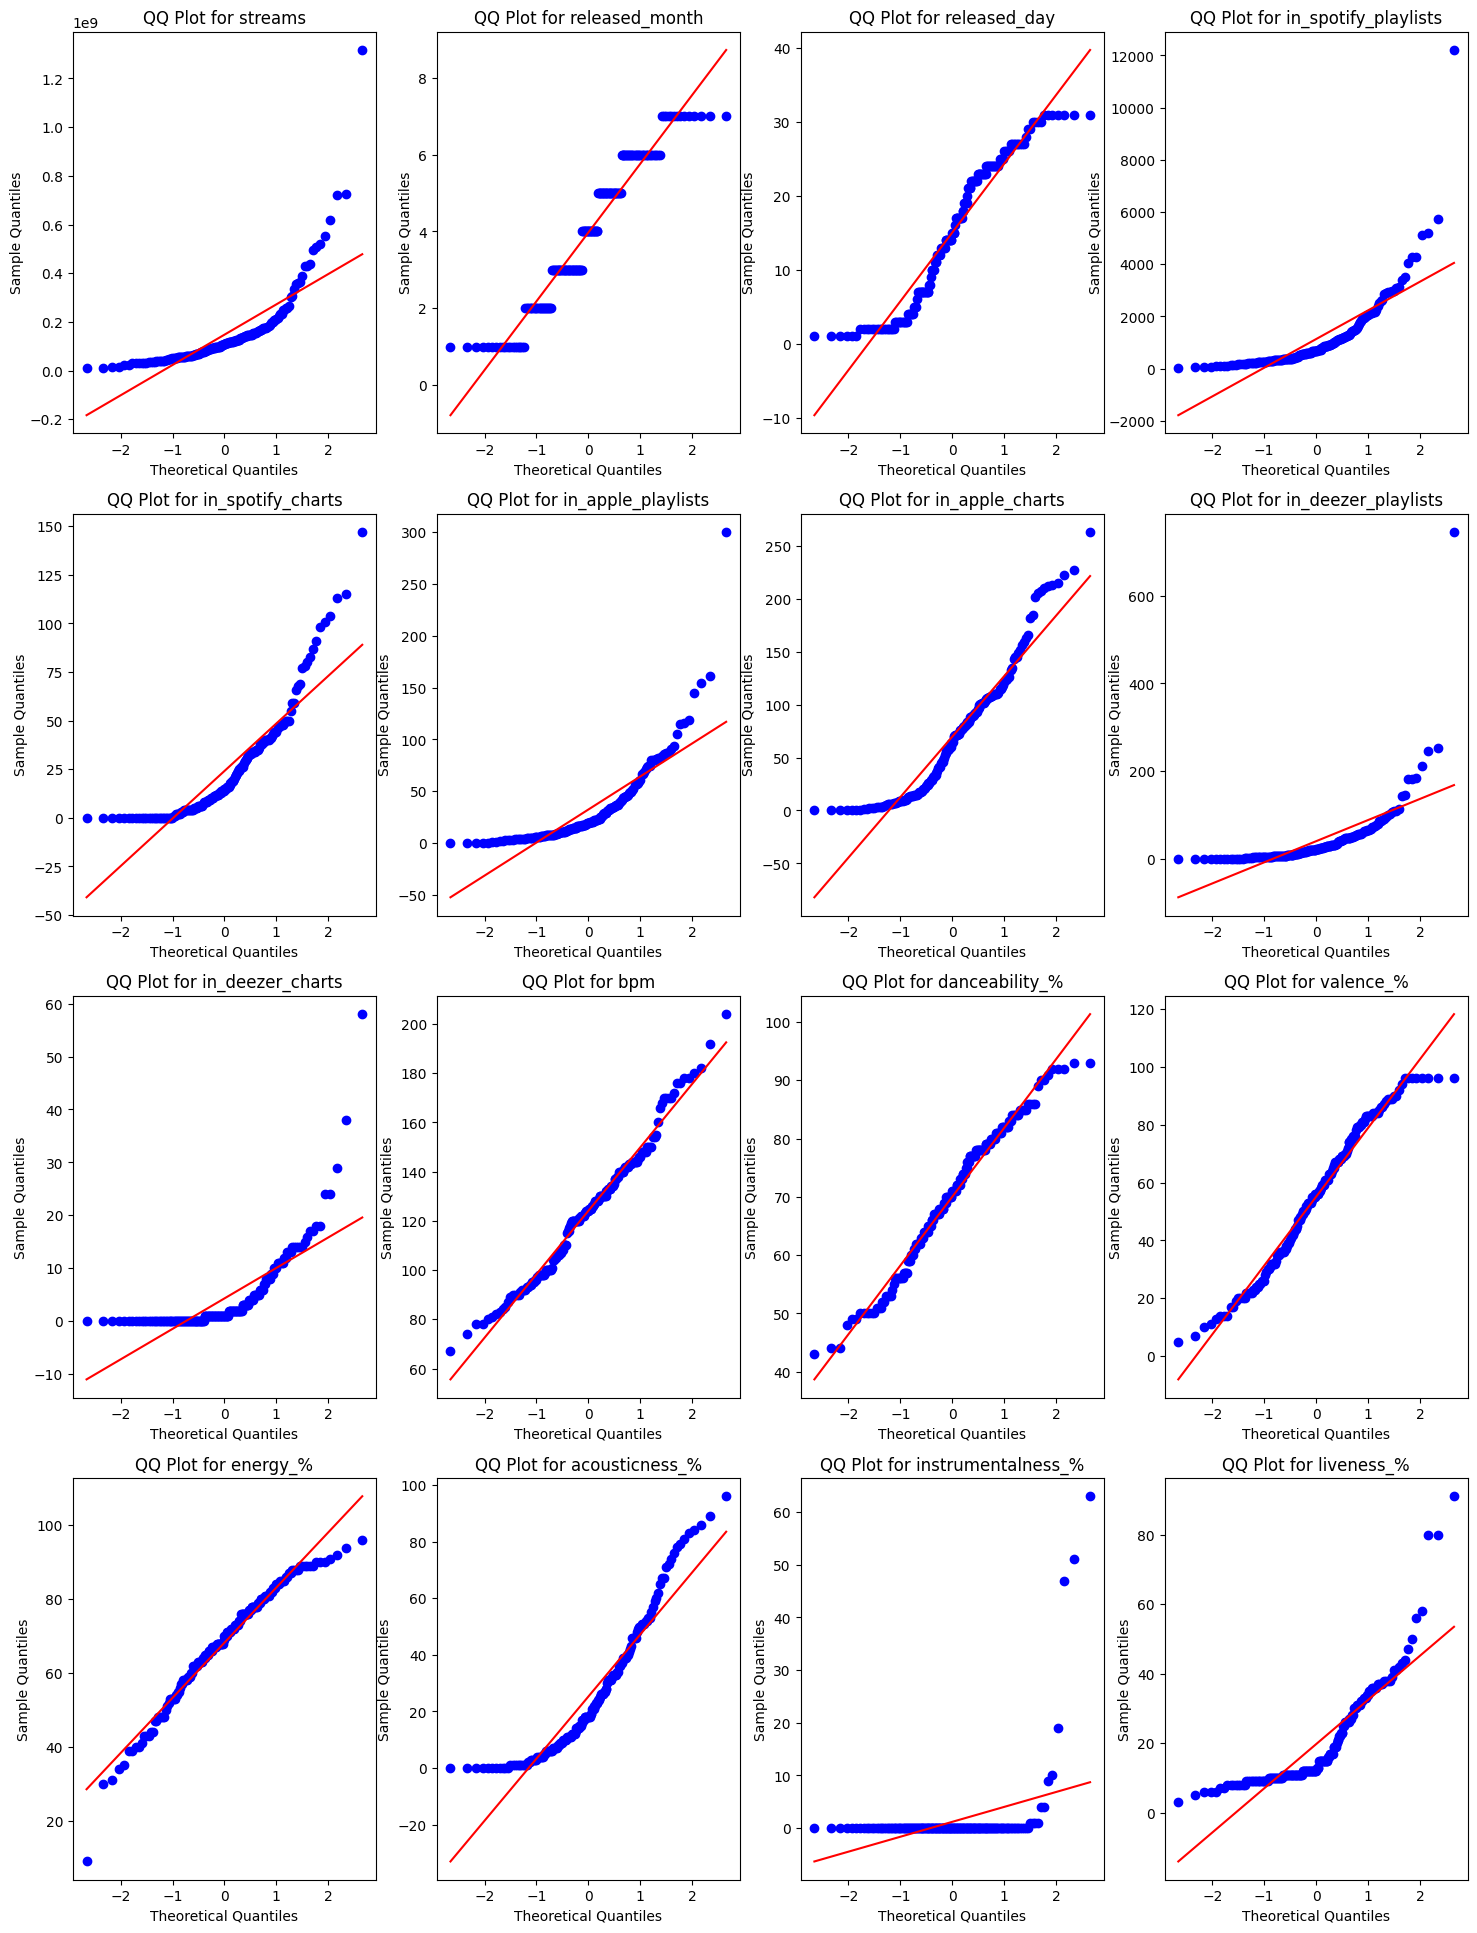

In [30]:
#Part 3: Plotting QQ Plots for each variable

selected_columns = data3[['streams', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]


# Create a figure with subplots for QQ plots
qqplot = len(selected_columns)
fig, axes = plt.subplots(4 ,4 , figsize=(18,24))
axes = axes.ravel()


#Step 1: Creating qq plot for each variable in the selected_columns list by using for function:
for x, y in enumerate(selected_columns):
    ax = axes[x]
    data = selected_columns[y]

    # Create a QQ plot for the variable
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'QQ Plot for {y}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

#Plot qq plots for each variable
plt.tight_layout()
plt.show()

Analysing QQ plots for each variable in the data set:

We have used this graphical tool used to assess whether the dataset follows a specific theoretical distribution, typically the normal distribution. If the points on the QQ plot fall along or near a straight line, it suggests that the data follows the theoretical distribution. If they deviate from a straight line, it indicates a departure from the theoretical distribution.


For bpm, ther numeric variables danceability_%, valence_%, energy_% the data follows the theoretical distribution.


For other variables like released_month, released_day, streams,acousticness_%, instrumentalness_%, liveness_%, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists, and in_deezer_charts, it indicates non-normality.

**INTERPRETATION:**

A probability plot shows how well your data is modelled by a particular distribution, typically the normal distribution.
-If the points on the QQ plot fall along or near a straight line, it suggests that the data follows the theoretical distribution.
-If they deviate from a straight line, it indicates a departure from the theoretical distribution.

**Non- Normal Variables:** streams, release_month, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_deezer_playlists, in_deezer_charts, instrumentalness_%, liveness_%

**Normal Variables:** release_day, in_apple_charts, bpm, danceability_%, valence_%, energy_%, accousticness_%

/var/folders/5c/3157mbn910b2gp0sphv4k8xm0000gn/T/ipykernel_38762/2902799245.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=ax, hist=True, kde=True,
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

IndexError: index 16 is out of bounds for axis 0 with size 16

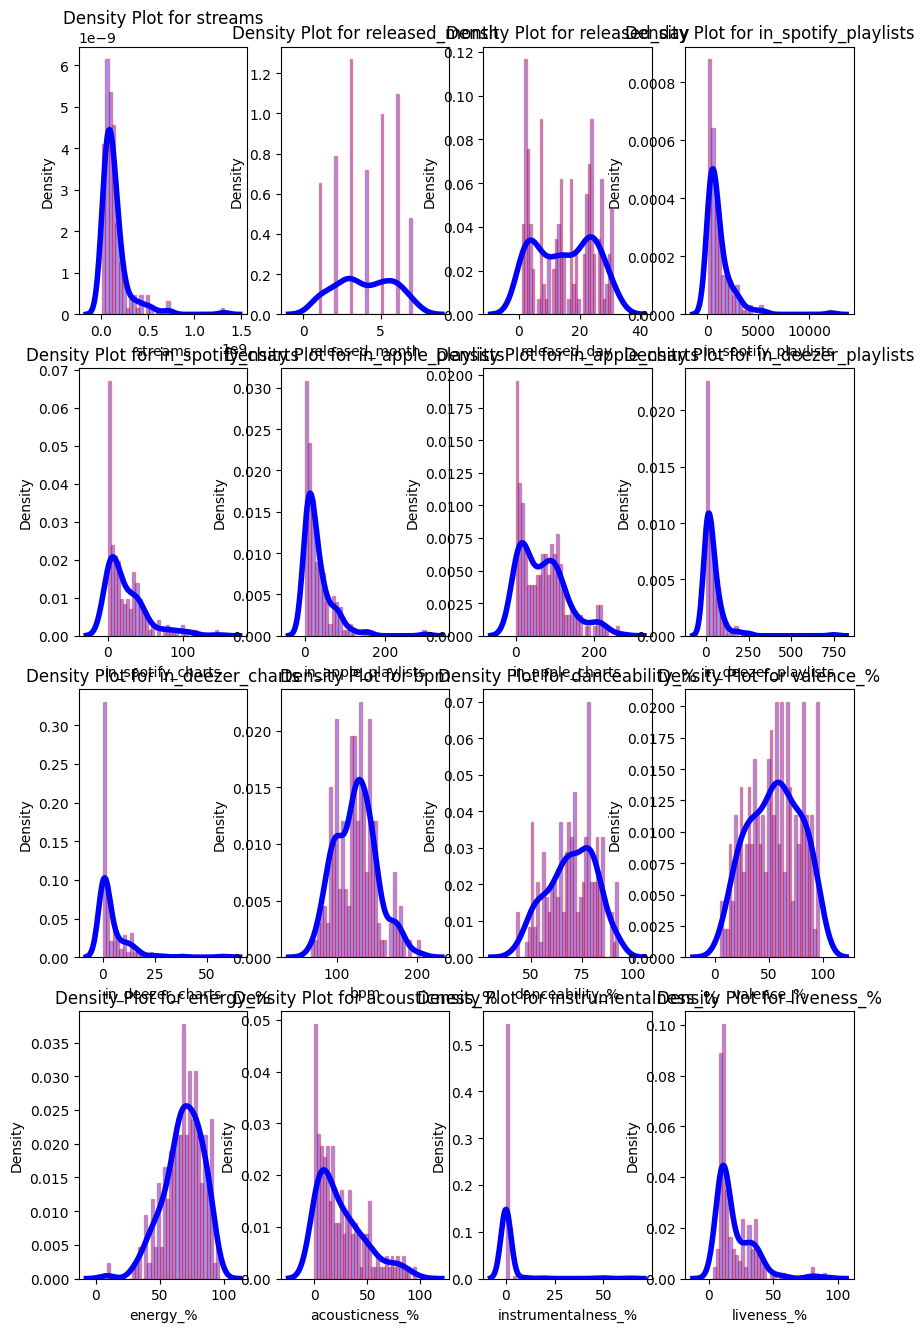

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for Density estimates
fig, axes = plt.subplots(4, 4, figsize=(10, 16))
axes = axes.ravel()

# Creating density plots for each variable in the selected_columns list using a for loop:
for a, b in enumerate(selected_columns):
    ax = axes[a]
    data = selected_columns[b]

    # Create a density plot for the variable
    sns.distplot(data, ax=ax, hist=True, kde=True,
                 bins=int(180/5), color='blue',
                 hist_kws={'edgecolor': 'red'},
                 kde_kws={'linewidth': 4})
    ax.set_title(f'Density Plot for {b}')
    ax.set_xlabel(b)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


Analysis of Density plot:

Density plots are data visualization tools used to understand the distribution of a dataset. The following observations are made after analysing density estimation plots:

1.Data Distribution Shape: We can observe skewness in variables (streams, in_spotify_playlists, liveness_%, energy_%, acousticness_%).

2.Spread of the density plots: The variable 'instrumentalness_%' does not seem to be a strong variable for the analysis as it is highly skewed with a very narrow distribution indicating lower variability.

3.Normality Assessment: A proper and symmetric density plot can be an indication that the data follows a normal distribution. The variable 'valence_%' is the closest to normal distribution.

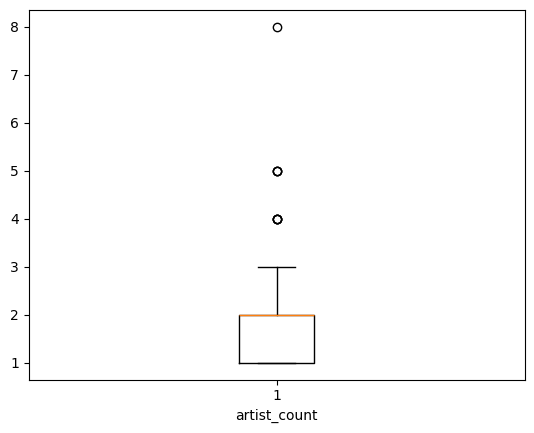

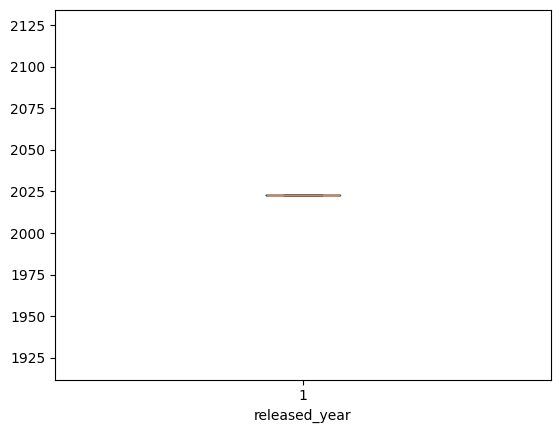

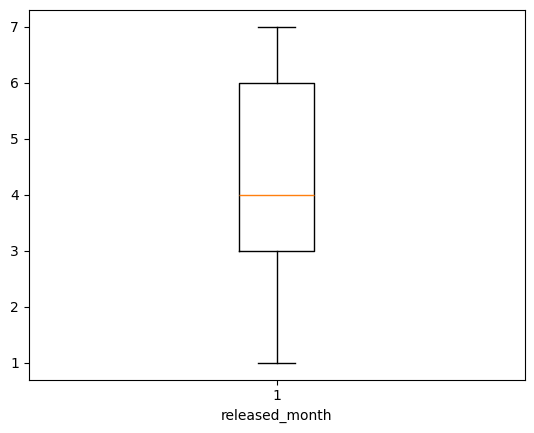

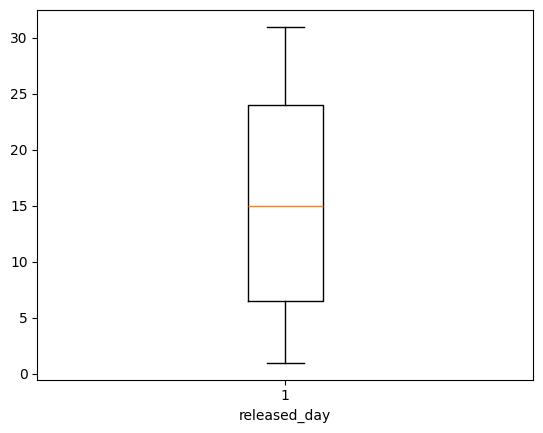

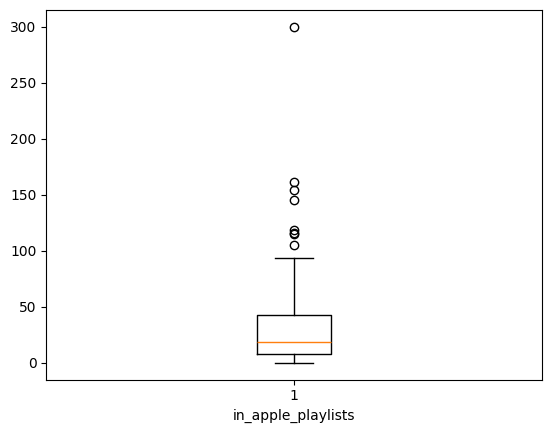

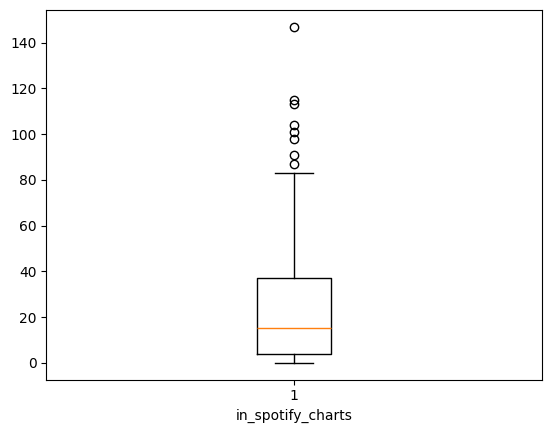

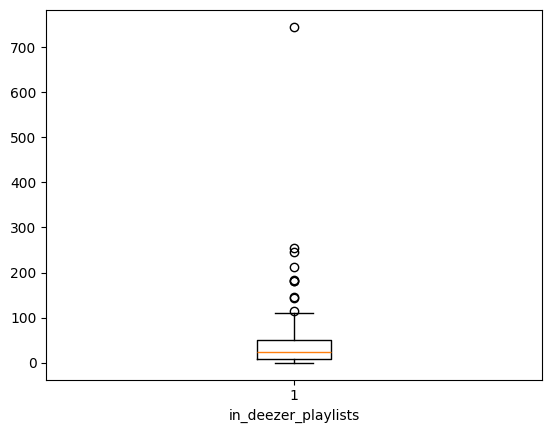

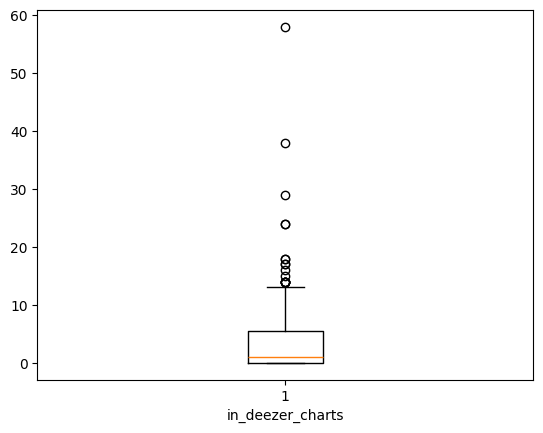

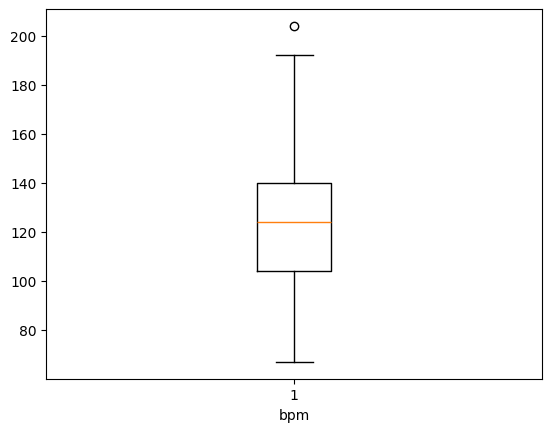

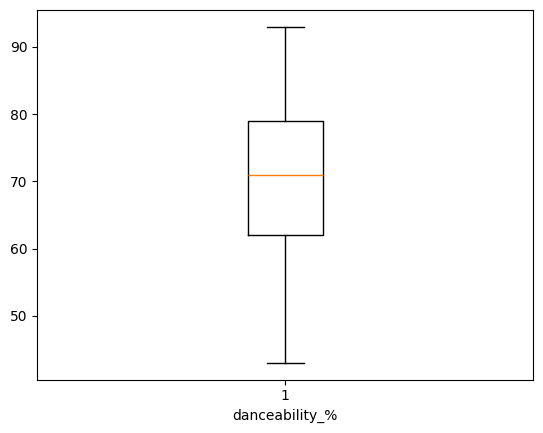

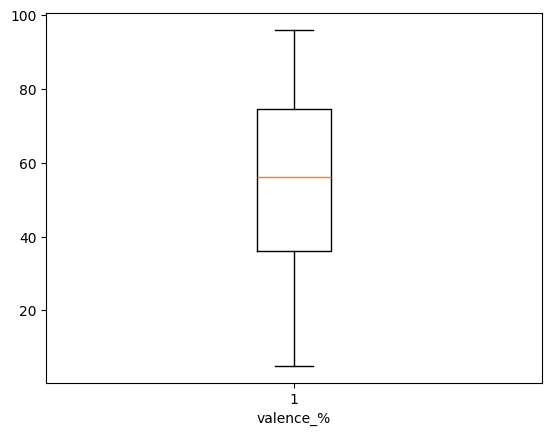

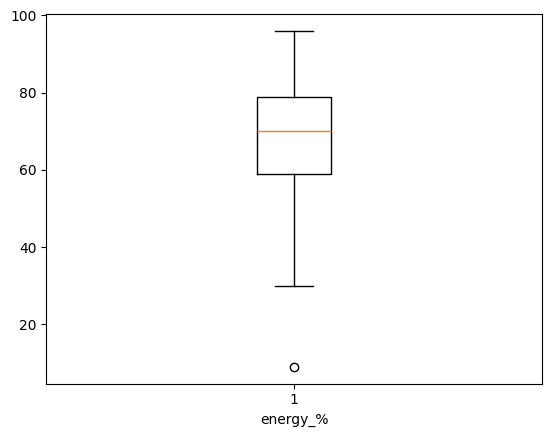

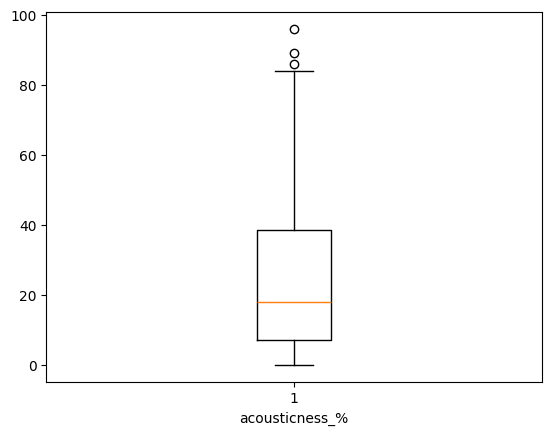

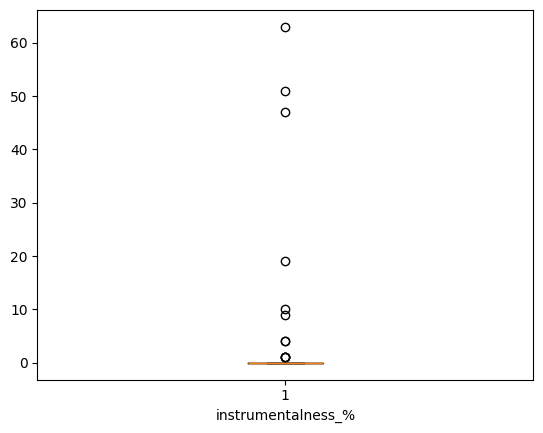

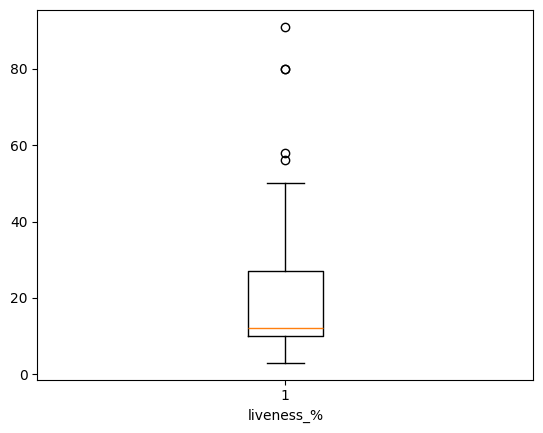

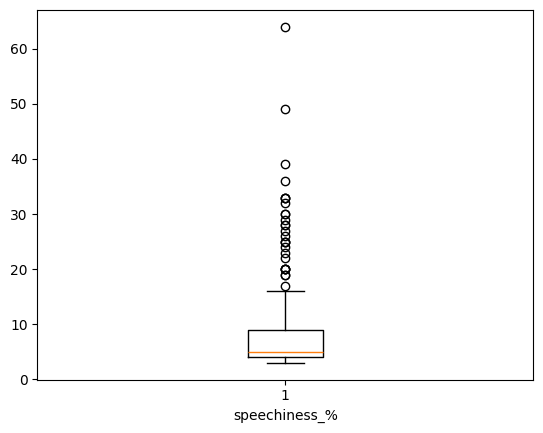

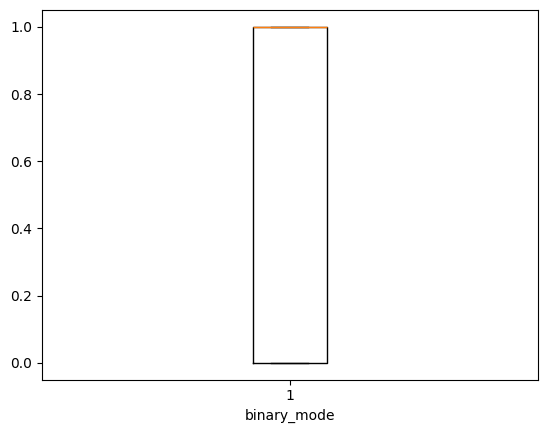

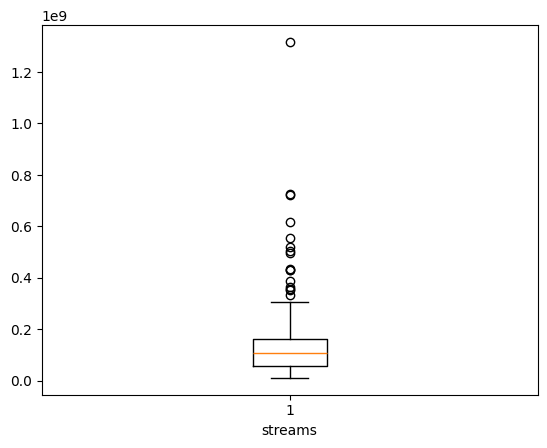

In [32]:
# Box PLots: will have to make boxplot for streams separately since it's range is larger as comapred to the others
selected_variables2 = data3[['artist_count','released_year','released_month', 'released_day','in_apple_playlists', 'in_spotify_charts','in_deezer_playlists', 'in_deezer_charts','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%','liveness_%','speechiness_%', 'binary_mode', 'streams']]

#new code (with loop)
for a in selected_variables2:
  plt.boxplot(selected_variables2[a])
  plt.xlabel(a)
  plt.show()

Analysis of box plots:

As we can see even after separating streams there seems to be huge outliers which are affecting the other boxplots. Hence we will have to map the variables with large numbers separately (can identify using mean value)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

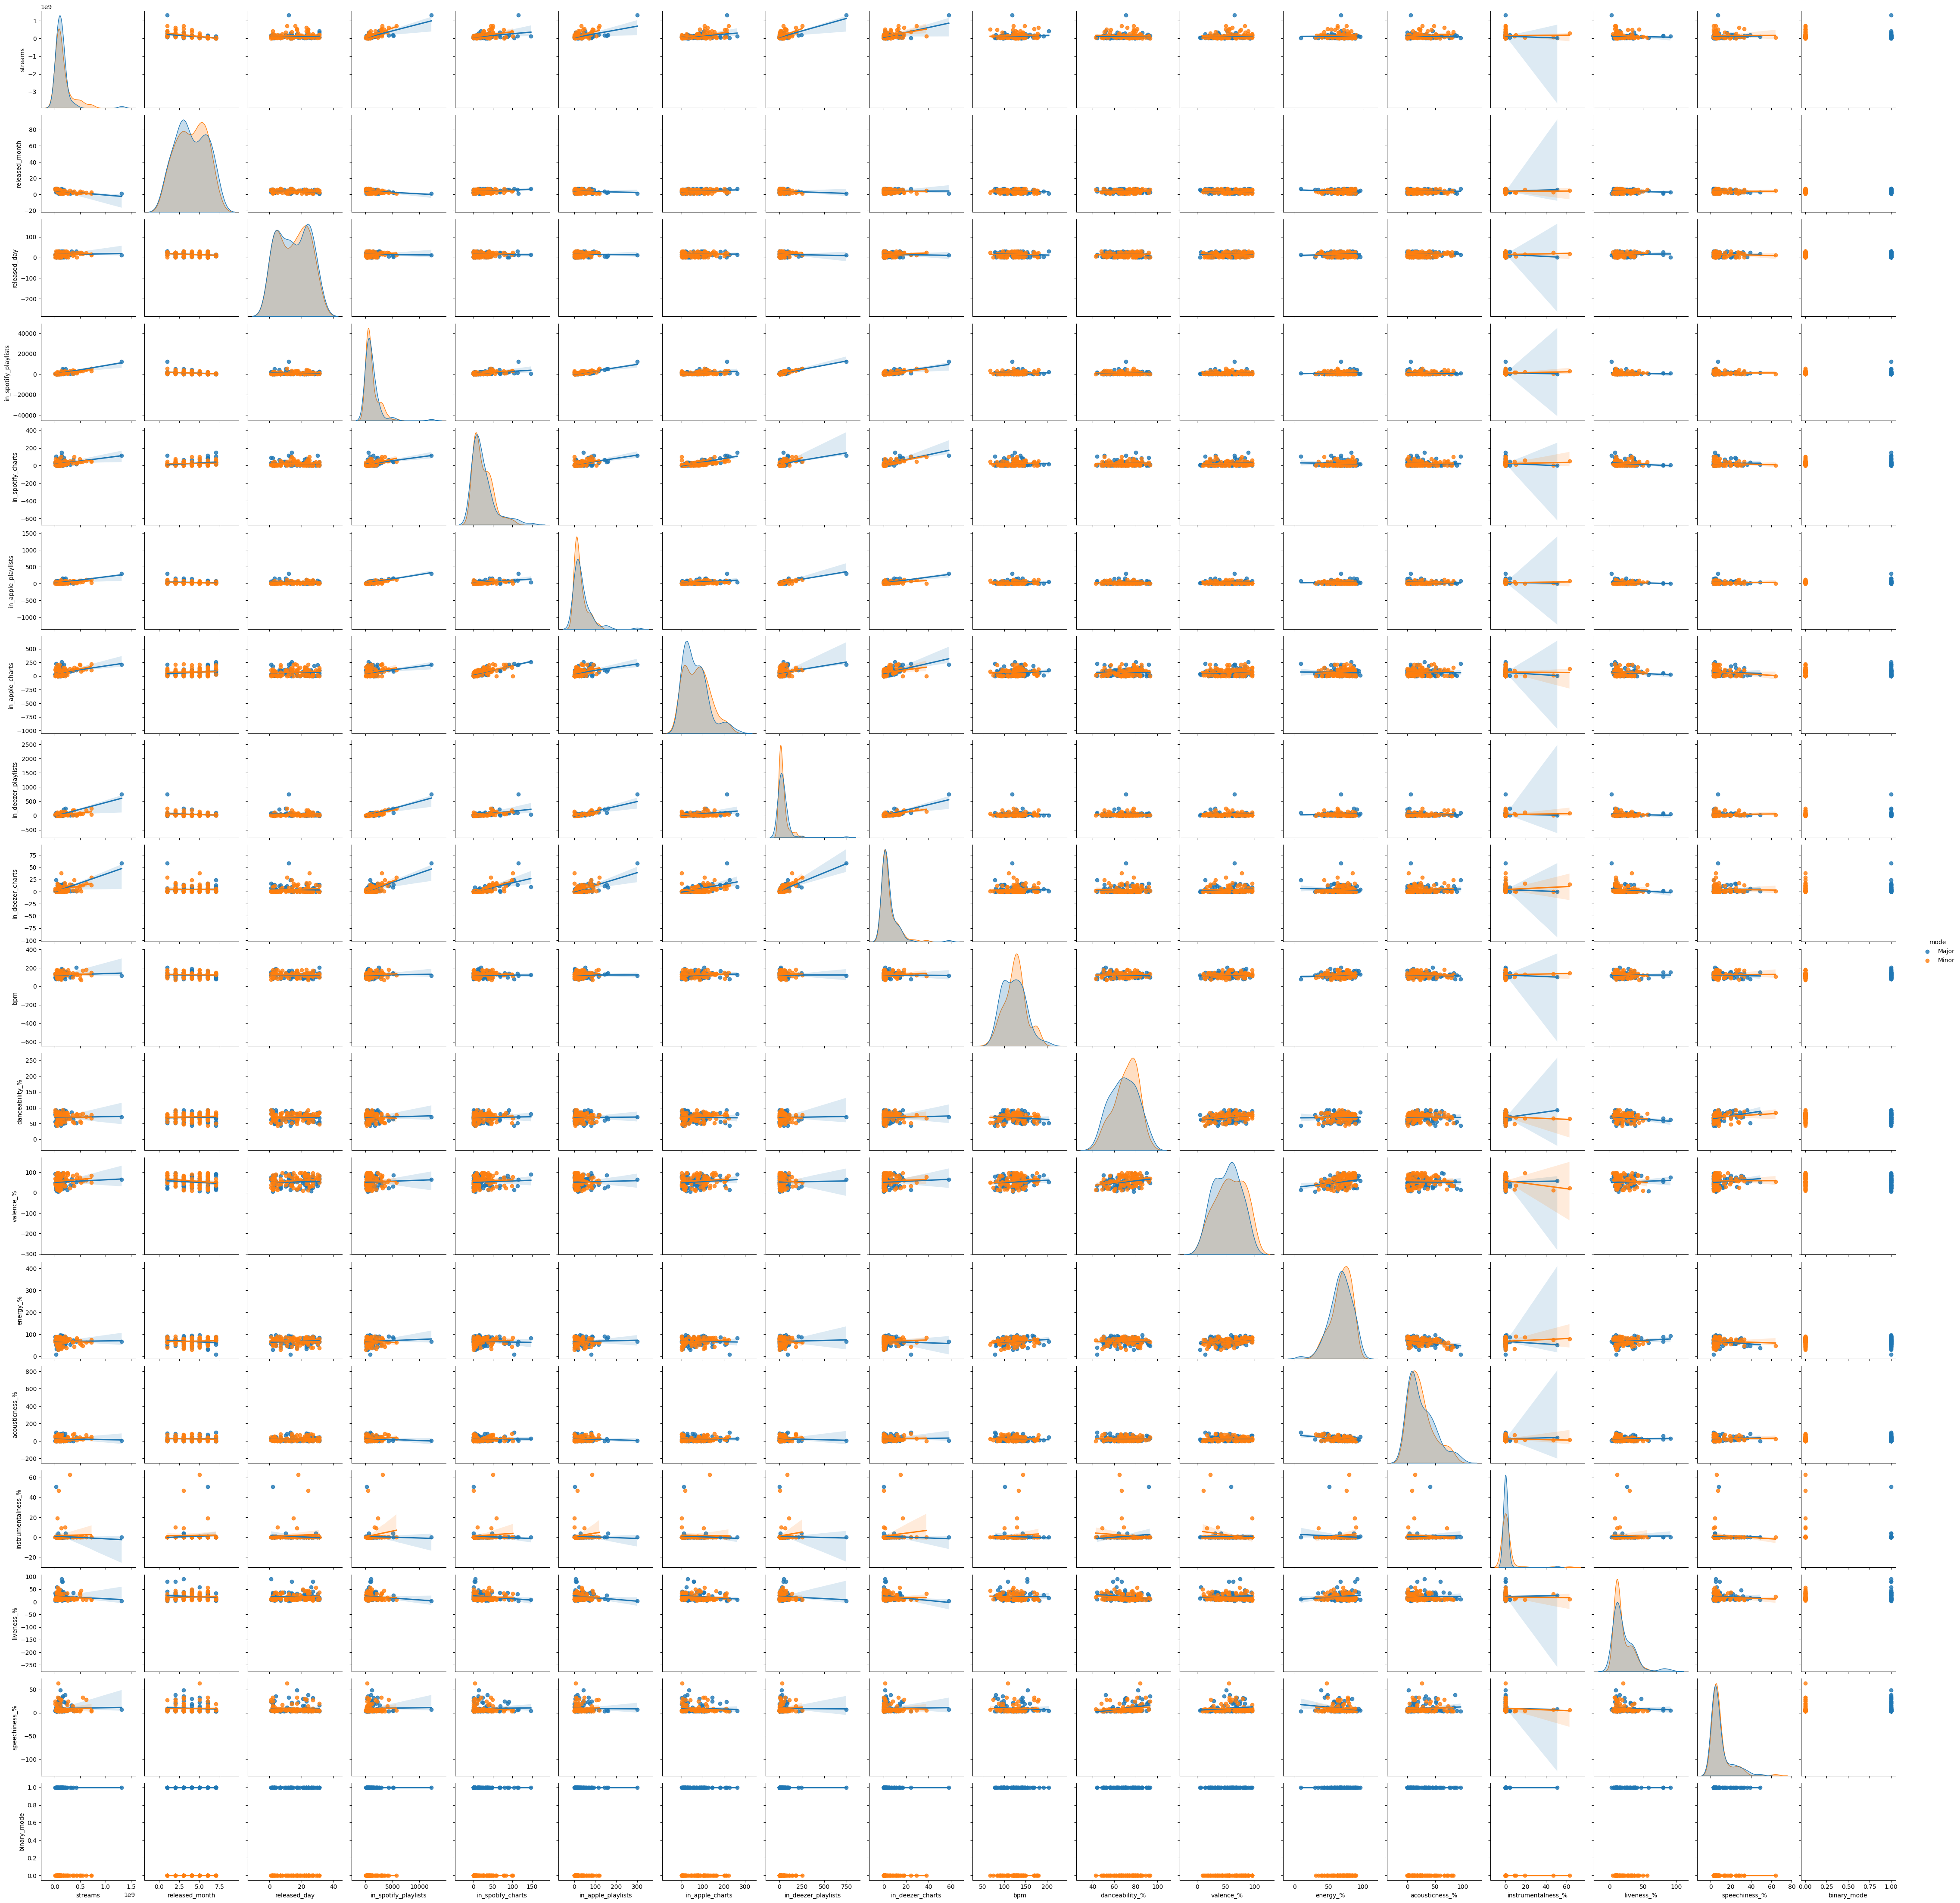

In [33]:
#Part 5: Scatterplot Matrix

sns.pairplot(data3 ,vars=['streams', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'binary_mode'], kind = "reg", hue='mode')

Analysis of scatterplot:

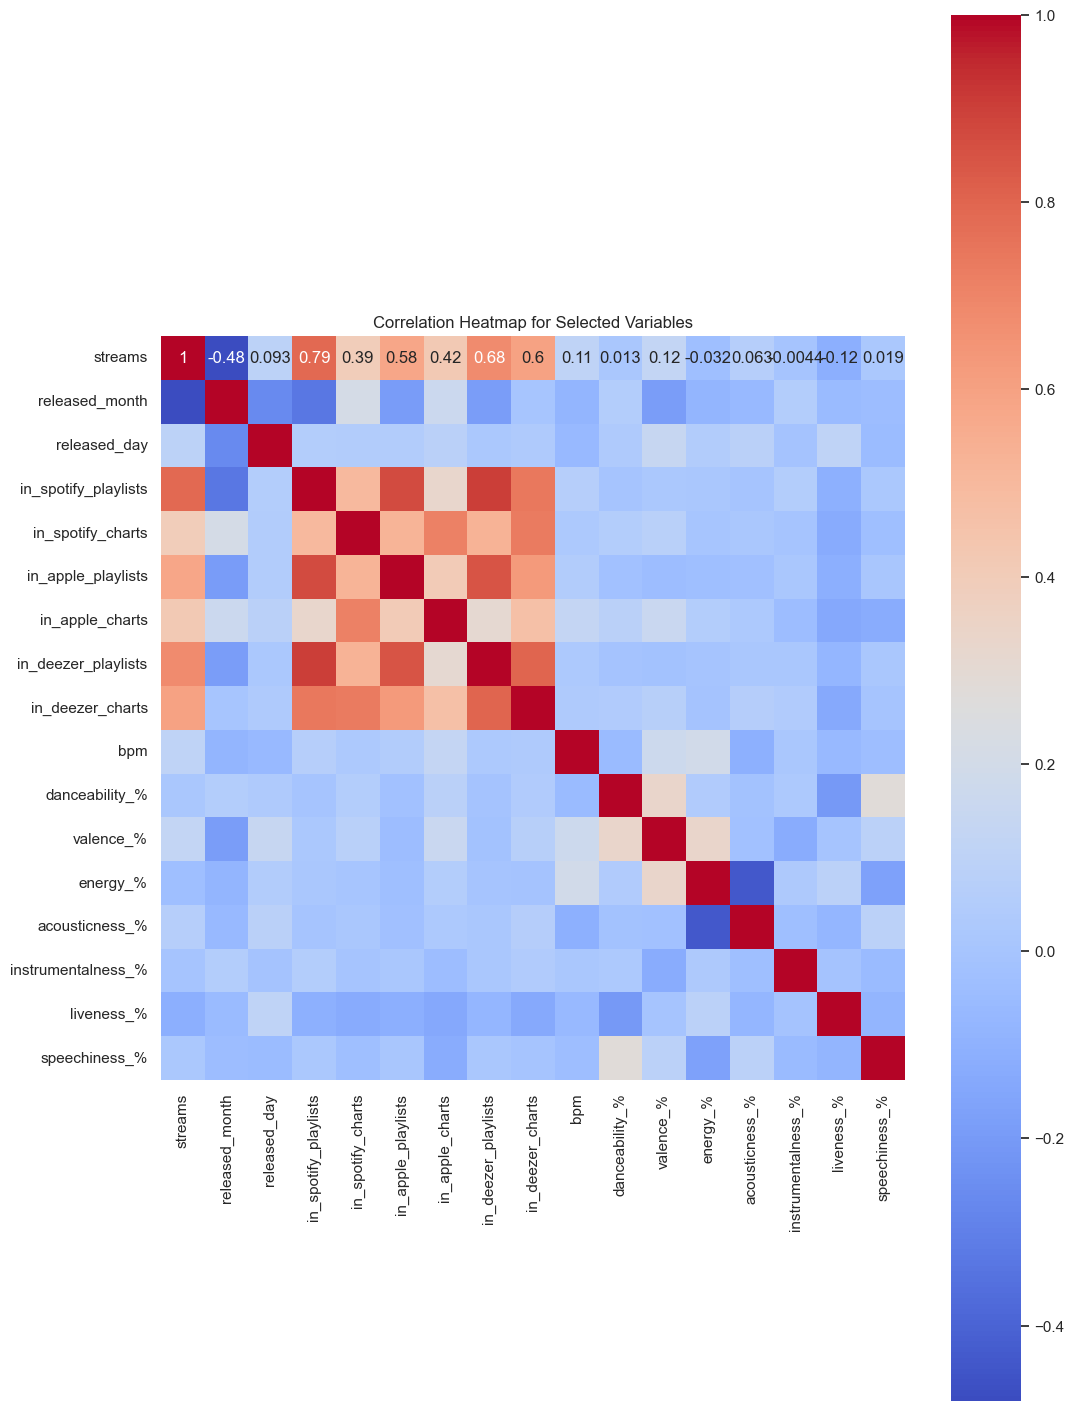

In [34]:
# Part 6: Using the heatmap function to create a correlation heatmap

correlation_matrix = selected_columns.corr()

# Create a heatmap
sns.set(font_scale=1)
plt.figure(figsize=(12, 18))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Heatmap for Selected Variables")
plt.show()


Analysis of Correlation heat map:

A correlation heatmap is a visual representation of the pairwise correlations between variables in a dataset. Analyzing a correlation heatmap can provide valuable insights into the relationships between variables.

1.Positive correlation: streams tends to have a higher correlation with variable 'in_spotify_playlists' and 'in_deezer_playlists'. There is also a high correlation (0.87) between 'in_spotify_playlists' and 'in_deezer_playlists'as it is much closer to a correlation of 1. The highest correlation is observed between varaibles 'in_deezer_playlists' and 'in_spotify_playlist', thus, these two variables should not be taken together in one model.

2.Negative correlation: There is a negative correlation between energy of the song and accousticness of the song. Thus, lower the accousticness of the song, higher is the energy. However this negative correlation is not that high and thus, might not impact the model.

Thus, the top 2 strongly correlated sets of variables are: (in_deezer_playlists and in_spotify_playlists) and (in_apple_playlists and in_spotify_playlists).

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

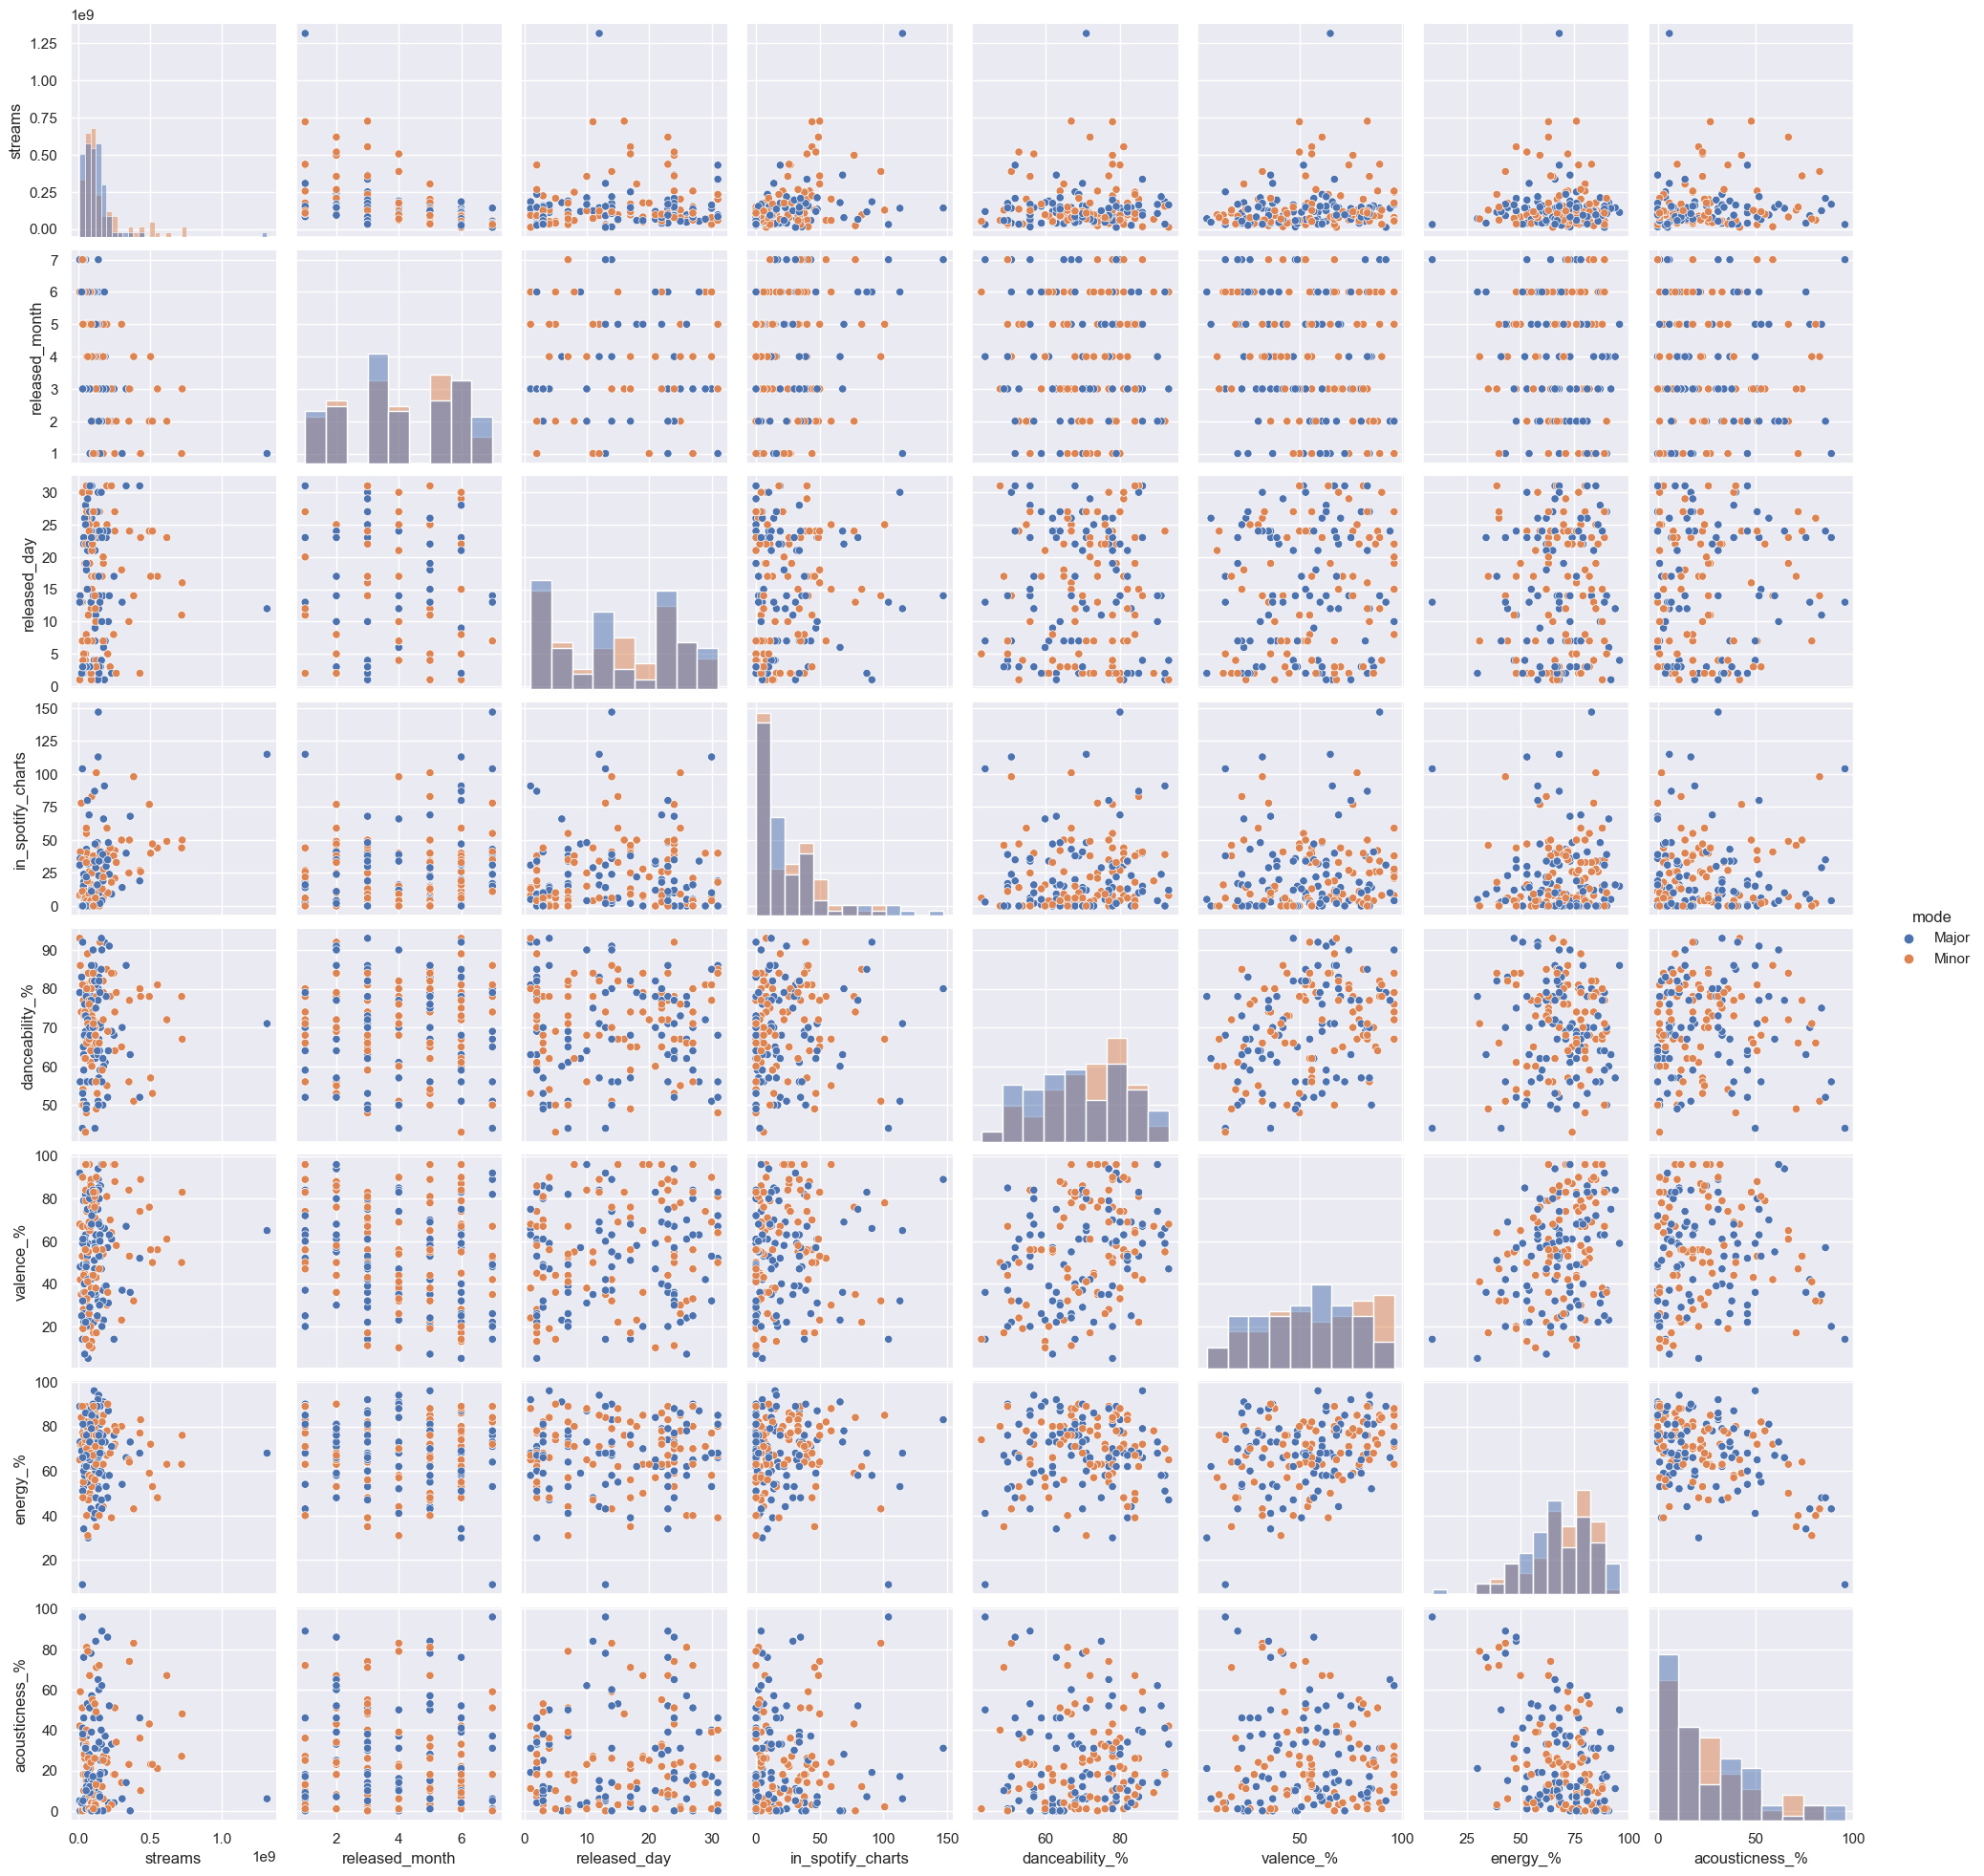

In [35]:
# Part 7: Scatterplot Matrix (Only for variables that are important for the Analysis)

sns.pairplot(data3, vars=['streams', 'released_month', 'released_day', 'in_spotify_charts', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%'], diag_kind="hist", hue= 'mode')

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

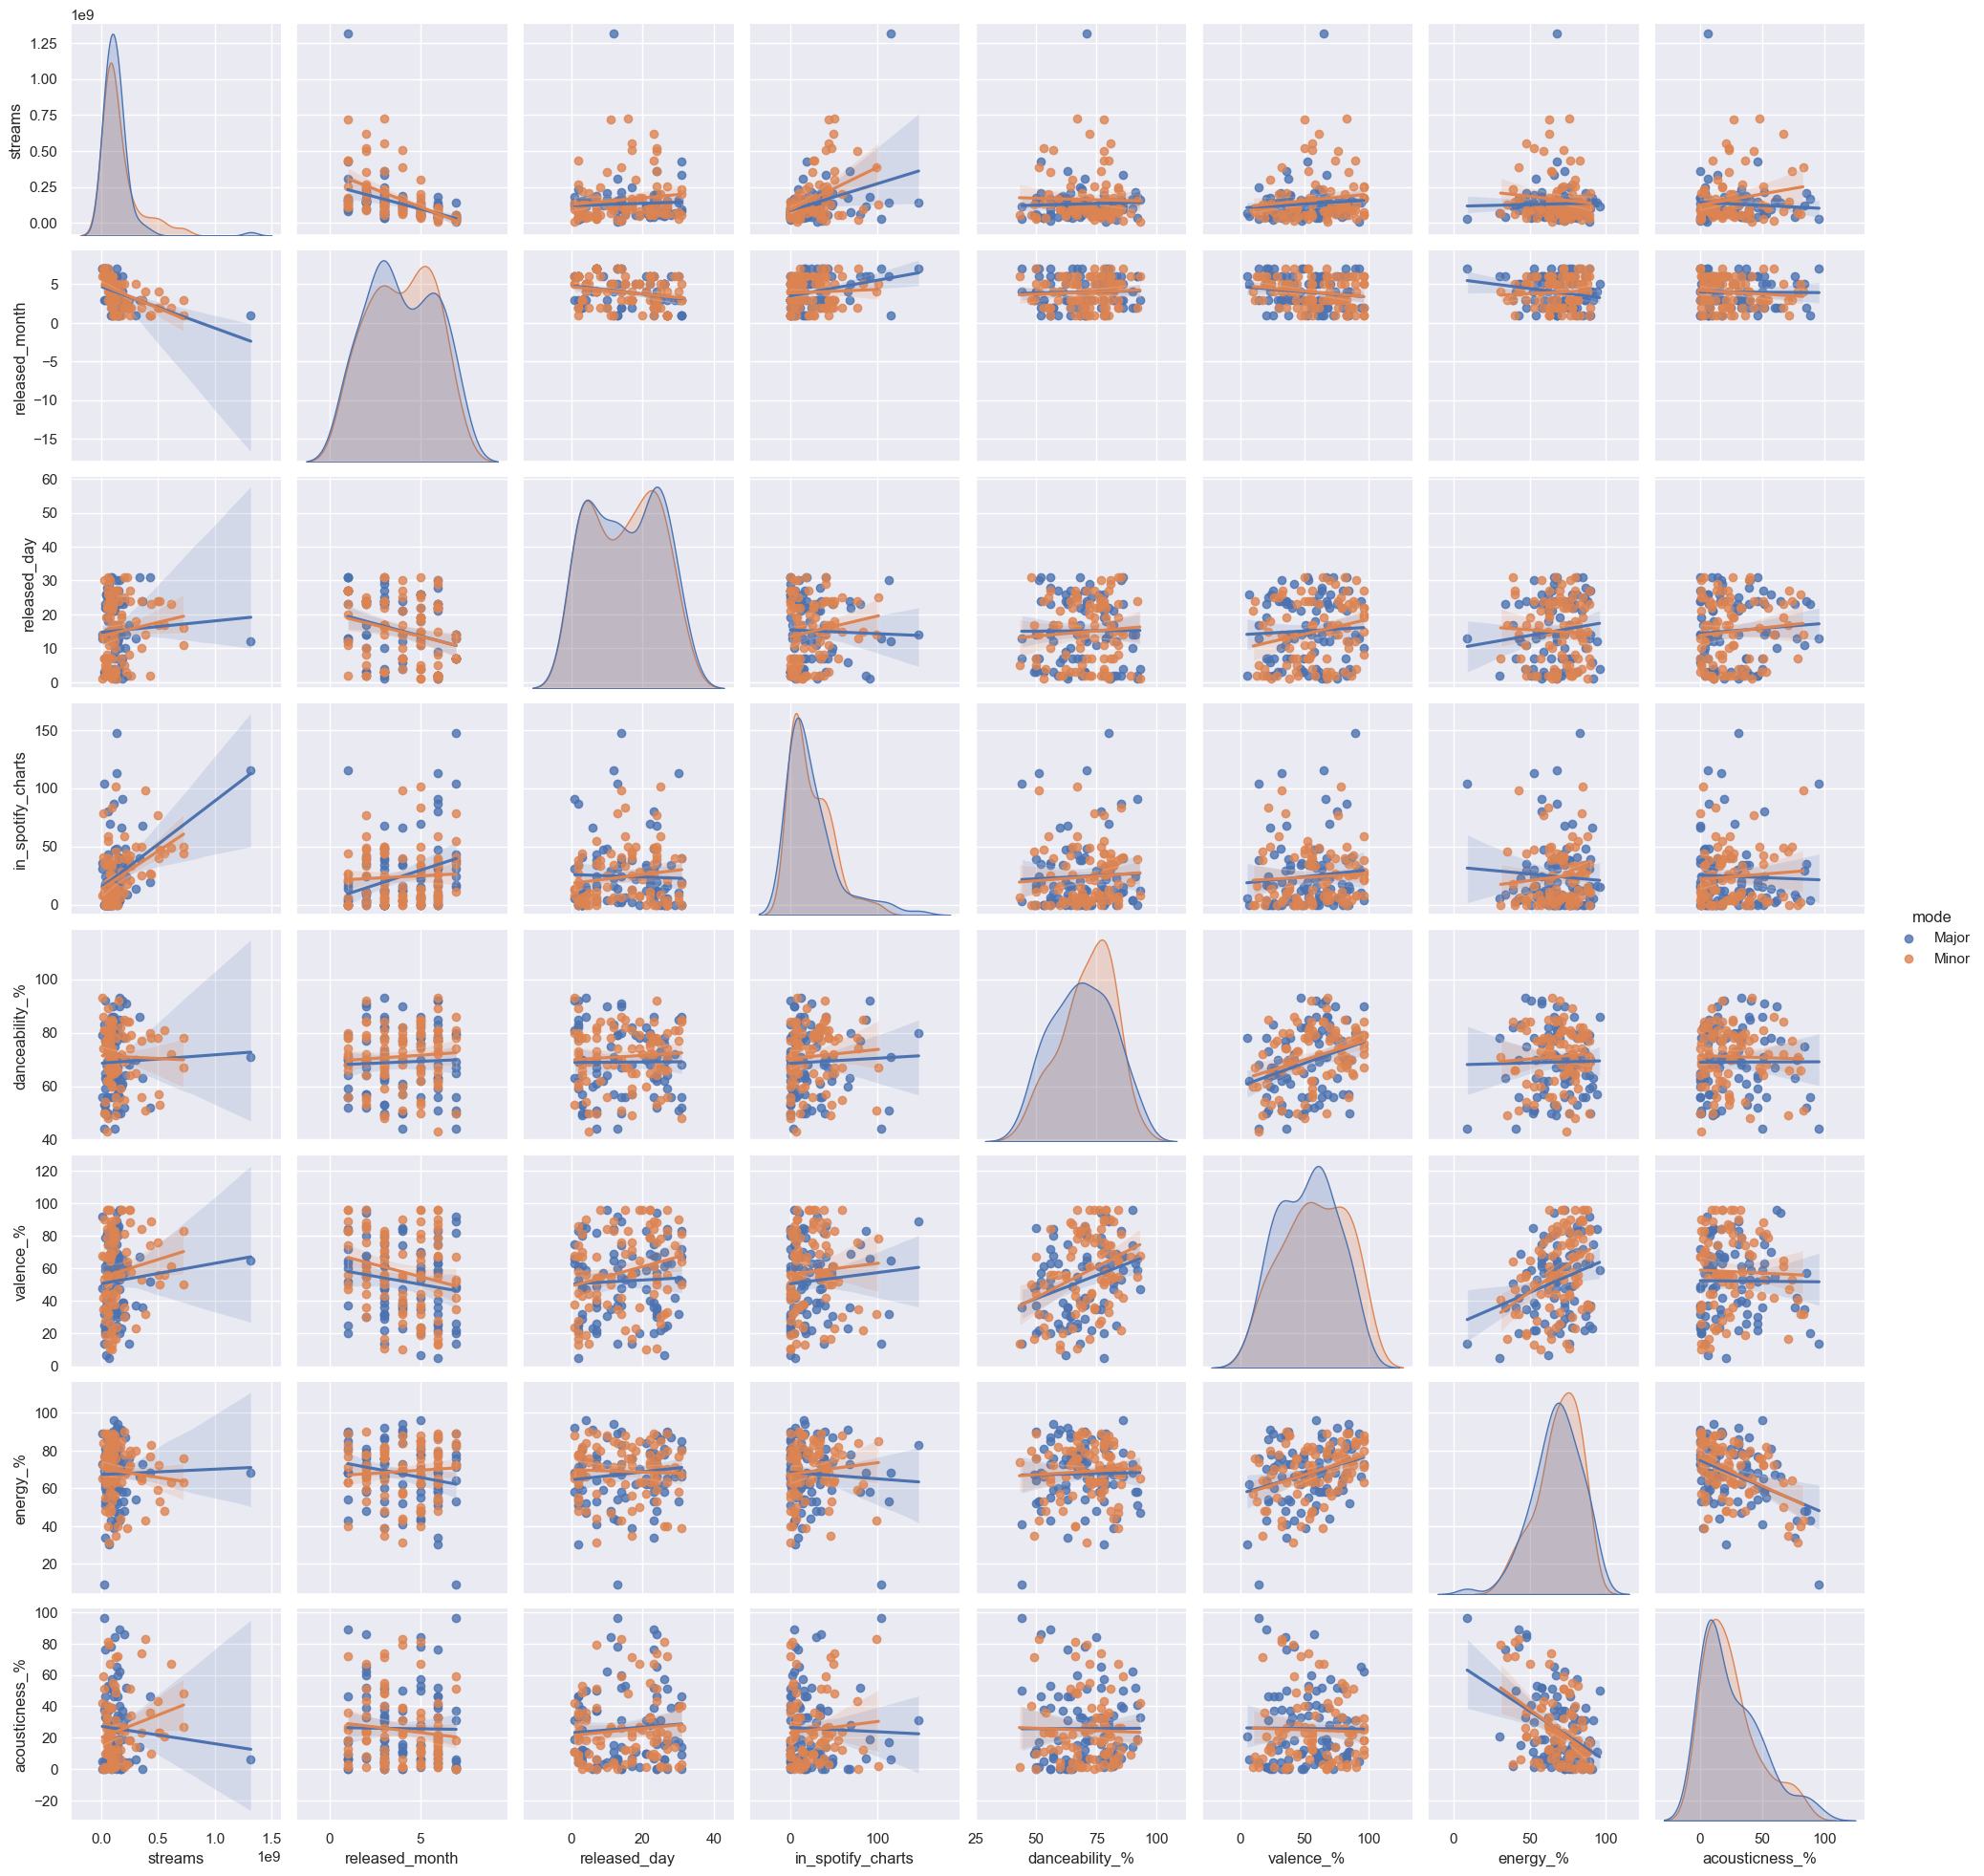

In [36]:
sns.pairplot(data3 ,vars=['streams', 'released_month', 'released_day', 'in_spotify_charts', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%'], kind = "reg", hue='mode')

# Pandas Profilling

In [42]:
pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5a/14/a19d2266adf443d441be74d65e4ac12ba252c806ccf7ffdb59c7443bd846/ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for pandas!=1.4.0,<2.1,>1.1 from https://files.pythonhosted.org/packages/8f/bb/aea1fbeed5b474cb8634364718abe9030d7cc7a30bf51f40bd494bbc89a2/pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
  Obtaining dependency information for matplotlib<=3.7.3,>=3.2 from https://files.pythonhosted.org/packages/19/56/24e69f899d68f6393c2b9259c66b6fb987631d9e91c2185afb890340c16e/matplotlib-3.7.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.7.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Obtaining dependency

In [43]:
from pandas_profiling import ProfileReport

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.4/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.4/u/import-error

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data3)

# Cullen Frey

In [44]:
import math

In [45]:
pip install fitter

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Fit various distributions:
import math
selected_variables= ['streams', 'released_month', 'released_day', 'in_spotify_charts', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
#selected_variables= ['released_month', 'released_day', 'in_spotify_charts', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
data4 = data3.copy()
data4['streams'] = data4['streams'].apply(lambda x:math.log10(x))

In [47]:
from fitter import Fitter
f = Fitter(data4[selected_variables])
f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distributi

sumsquare_error          aic          bic  kl_div  \
johnsonsb             0.006353  1131.767280  1152.744190     inf   
fatiguelife           0.006410  1156.691581  1172.424264     inf   
recipinvgauss         0.006519  1148.394798  1164.127480     inf   
levy                  0.006564  1202.085840  1212.574295     inf   
genhyperbolic         0.006824  1147.409119  1173.630257     inf   

               ks_statistic     ks_pvalue  
johnsonsb          0.100768  7.905051e-13  
fatiguelife        0.132323  7.768314e-22  
recipinvgauss      0.120079  4.770475e-18  
levy               0.247317  6.547457e-76  
genhyperbolic      1.000000  0.000000e+00

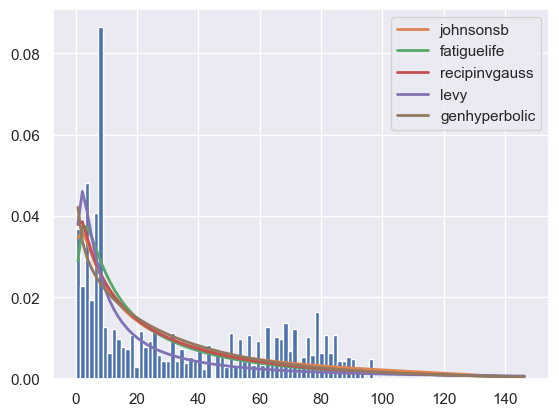

In [48]:
f.summary()

Following is the result of fitting a log-normal distribution using the Cullen and Frey (Cullen and Frey's) goodness-of-fit test which is used to assess whether our data follows a specific probability distribution, in this case, the log-normal distribution. The interpretation of the result:

1. The sum of squared errors is a measure of the differences between the empirical data and the log-normal distribution fit. In our case, it's 0.022478, indicating how well the log-normal distribution fits the data. It is a small value suggesting a better fit.

2. Akaike Information Criterion (AIC) is a measure of the model's goodness of fit, adjusted for its complexity. A lower AIC value suggests a better fit. In this case, it's 1338.170073.

3. Bayesian Information Criterion (BIC) is a measure of model fit that penalizes model complexity. A lower BIC value indicates a better fit. In this case, it's 1353.902755.

4. Kullback-Leibler Divergence (kl_div) is a measure of the difference between the log-normal distribution and the data's empirical distribution. An "inf" value suggests that the KL divergence is infinite, which can happen when the fitted distribution does not exactly match the data's distribution.

5. Kolmogorov-Smirnov Statistic (ks_statistic) is a measure of the maximum discrepancy between the cumulative distribution function (CDF) of the fitted log-normal distribution and the empirical CDF of the data. A lower value indicates a better fit. In this case, it's 0.463761.

6. Kolmogorov-Smirnov P-Value (ks_pvalue): It assesses the null hypothesis that the empirical distribution and the fitted log-normal distribution are the same. A very small p-value (close to 0) indicates that the null hypothesis is rejected, suggesting a poor fit. In this case, the p-value is extremely close to zero (2.972588e-276), suggesting a significant difference between the two distributions.

# Cullen-Frey plot for log-normal distribution

In [49]:
data3[selected_variables]

streams  released_month  released_day  in_spotify_charts  \
0    141381703               7            14                147   
1    133716286               3            23                 48   
2    140003974               6            30                113   
4    303236322               5            18                 50   
5    183706234               6             1                 91   
..         ...             ...           ...                ...   
381  103787664               1            27                  0   
382  134255790               1            27                 16   
385  152850295               1            13                  2   
398  120972253               1            12                  6   
404  107642809               1            27                  0   

     danceability_%  valence_%  energy_%  acousticness_%  
0                80         89        83              31  
1                71         61        74               7  
2                51         32        53              17  
4                65         23        80              14  
5                92         66        58              19  
..              ...        ...       ...             ...  
381              70         84        90              17  
382              64         25        89               0  
385              79         60        68               7  
398              68         83        71               3  
404              71         83        89               1  

[175 rows x 8 columns]

sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.022478  1338.170073  1353.902755     inf      0.463761   

             ks_pvalue  
lognorm  2.972588e-276

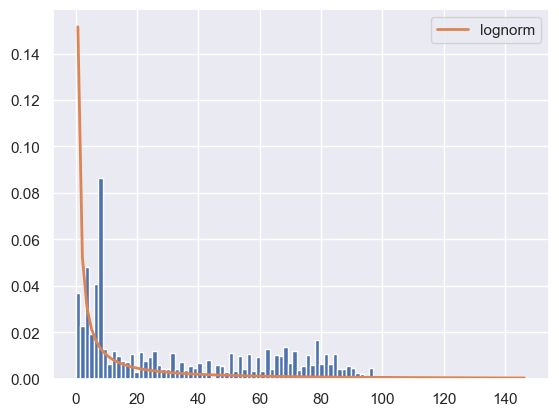

In [50]:
f_lognorm = Fitter(data4[selected_variables],distributions=['lognorm'])
f_lognorm.fit()
f_lognorm.summary()

In [51]:
data5 = data4[selected_variables]
data6 = data3[selected_variables]

# Boruta

In [52]:
#(a) Using the Boruta Algorithm identify the top 2 predictors

In [53]:
pip install Boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install BorutaShap

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [58]:
import shap

In [59]:
from BorutaShap import BorutaShap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
#Dropping columns with strings

data5= data3.drop(['track_name', 'artist(s)_name', 'mode'], axis=1)

In [ ]:
data5.head()

In [ ]:
x = data5.iloc[:, 1:]
y = data5['streams']

In [ ]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

In [ ]:
# Returns a subset of the original data with the selected features
Feature_Selector.Subset()

Analysis of variables after Boruta Shap:

According to the analysis done through Boruta Shap, the top 5 predictors found were 'in_spotify_playlists', 'in_apple_playlists', 'streams', 'in_deezer_charts', 'in_deezer_playlists'

# Using Mallows Cp identify the top 2 predictors

In [ ]:
pip install RegscorePy

In [ ]:
from RegscorePy import mallow

In [ ]:
#Dropping columns with strings

data5= data3.drop(['track_name', 'artist(s)_name', 'mode'], axis=1)

In [ ]:
data5.head()

In [ ]:
x = data5.iloc[:, 1:]
y = data5['streams']

In [ ]:
data5 = data5.rename(columns={'danceability_%': 'danceability', 'valence_%': 'valence', 'energy_%':'energy', 'acousticness_%':'acousticness', 'instrumentalness_%':'instrumentalness','liveness_%':'liveness', 'speechiness_%':'speechiness' })

In [ ]:
input_column_list = [ 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'energy', 'binary_mode']




In [ ]:
model = smf.ols(formula='np.log10(streams) ~ released_month+ released_day + in_spotify_playlists + in_spotify_charts + in_apple_playlists + in_apple_charts + in_deezer_playlists + in_deezer_charts + bpm + danceability + valence + energy + acousticness + instrumentalness + liveness + speechiness + binary_mode' ,data=data5)

results = model.fit()
y = np.log10(data5['streams'])
y_pred=results.fittedvalues


In [ ]:
import itertools
storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
for L in range(1,len(input_column_list)-8):
    for subset in itertools.combinations(input_column_list, L):
        #print('+'.join(list(subset)))
        mr_sub = smf.ols(formula='np.log10(streams)~ {}'.format('+'.join(list(subset))), data=data5)
        mr_sub_fit = mr_sub.fit()
        y_sub=mr_sub_fit.fittedvalues

        k = 18 # number of parameters in orginal model (includes y-intercept)
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)

        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        storage_cp = pd.concat([storage_cp,pd.DataFrame({'Variables': subset, 'CP': cp})])



In [ ]:
storage_cp

In [ ]:
df=storage_cp

In [ ]:
df= df.iloc[(df['CP']).abs().argsort()[:9]]

In [ ]:
print(df)

The overall result of this test shows that in selected 8 rows from 'df' where they are closest to zero. It gives us the top predictors i.e. released_day, released_month, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists & energy.

# OLS REGRESSION MODEL

Before running the OLS regression, we do the graphical analysis of the data through pairplot to check how each variable is distributed. The data is compared according to the mode of the song (Major and Minor)

## Distribution of data

In [ ]:
sns.pairplot(data5,vars=['streams', 'in_apple_playlists', 'in_spotify_playlists','in_deezer_charts', 'released_month' ],hue="binary_mode", diag_kind="hist")

Analysis of distribution of the data:



## OLS

### Using statsmodels.formula.smf estimate the regression parameters for MODEL 1:
$$streams\,=\,\beta_{0}+\beta_{1}(inappleplaylists)+u$$

In [ ]:
#OLS for model 1

reg = smf.ols('streams ~ in_apple_playlists', data = data5)
model1 = reg.fit()
model1.params
# Look at the Model1 Fit Summary
print(model1.summary())

In [ ]:
plt.scatter(data5.in_apple_playlists, data5.streams)
plt.plot(data5in_apple_playlists, model1.fittedvalues, color = 'red')
plt.title('Regression Plot for Model 1')
plt.xlabel('% of Songs in Apple Playlists')
plt.ylabel('No. of Streams')
plt.grid()

In [ ]:
figD = sm.graphics.plot_regress_exog(model1, "in_apple_playlists")
figD.set_figheight(10)
figD.set_figwidth(8)
plt.show()

**Lagged Partial Residual Plot:**

This plot helps assess if there are any serial correlations or patterns in the residuals.
A random, scattered pattern suggests that there is no serial correlation in the residuals.

**Residuals vs. Explanatory Variable Plot:**

This plot assesses whether there is a linear relationship between the explanatory variable and the residuals.
If the residuals appear to be randomly scattered around zero, this is a good sign. However, if you notice a pattern or curvature in the residuals, it might suggest a violation of linearity.

**Partial Regression Plot:**

This plot illustrates the relationship between the dependent variable and the explanatory variable while holding all other variables constant.
It can help you identify the individual impact of predictor on the dependent variable after accounting for the effects of other variables.

**Component and Component Plus Residual (CCPR) Plot:**

The CCPR plot shows the relationship between the explanatory variable and the predicted values, taking into account the effect of other variables.
If this plot exhibits a linear pattern, it indicates a strong relationship between the predictor and the dependent variable. A significant difference between the residual line and the actual distribution of values indicates that the predictor does not have a linear relationship with the dependent variable.

**In a good linear regression model:**
- the residuals should be randomly scattered around zero in the residuals vs. explanatory variable plot.
- In the partial regression plot and CCPR plot, you should look for linearity in the relationship.
- In the lagged partial residual plot, you should expect a lack of pattern or correlation.


In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(8, 6))
sns.regplot(x=model1.fittedvalues, y=data5['streams'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=model1.fittedvalues, y=model1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

**OBSERVED VS FITTED GRAPH**

Ideally, all your points should be close to a regressed diagonal line. If your model had a high R Square, all the points would be close to this diagonal line. The lower the R Square, the weaker the Goodness of fit of your model, the more foggy or dispersed your points are (away from this diagonal line).

**RESIDUALS VS PREDICTED VALUES PLOT**

 a well-behaved plot will bounce randomly and form a roughly horizontal band around the residual = 0 line

Values observed from Model 1 for analysis done below:

1.R squared value: 0.338

2.Adj. R-squared: 0.334

3.Prob (F-statistic): 3.31e-17

4.Durbin-Watson:1.984

5.Jarque-Bera (JB):202.537

# Model 2:
$$streams\,=\,\beta_{0}+\beta_{1}( inspotifyplaylists)+u$$

In [ ]:
#OLS for Model 2
reg = smf.ols('streams ~ in_spotify_playlists', data = data3)
model2 = reg.fit()
model2.params
# Look at the Model Fit Summary
print(model2.summary())

In [ ]:
plt.scatter(data3.in_spotify_playlists, data3.streams)
plt.plot(data3.in_spotify_playlists, model2.fittedvalues, color = 'red')
plt.title('Regression Plot for model 2')
plt.xlabel('% of Songs in Spotify Playlists')
plt.ylabel('No. of Streams')
plt.grid()

In [ ]:
figD = sm.graphics.plot_regress_exog(model2, "in_spotify_playlists")
figD.set_figheight(9)
figD.set_figwidth(6)
plt.show()

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(8, 6))
sns.regplot(x=model2.fittedvalues, y=data3['streams'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=model2.fittedvalues, y=model1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

Values observed from Model 2 for analysis done below:

1.R squared value: 0.623

2.Adj. R-squared: 0.621

3.Prob (F-statistic): 1.83e-38

4.Durbin-Watson:1.923

5.Jarque-Bera (JB): 108.579

# Model 3:
$$streams\,=\,\beta_{0}+\beta_{1}(indeezerplaylists)+u$$

In [ ]:
reg = smf.ols('streams ~ in_deezer_playlists', data = data3)
model3 = reg.fit()
model3.params
# Look at the Model Fit Summary
print(model3.summary())

In [ ]:
plt.scatter(data3.in_deezer_playlists, data3.streams)
plt.plot(data3.in_deezer_playlists, model3.fittedvalues, color = 'red')
plt.title('Regression Plot for model 3')
plt.xlabel('% of Songs in Deezer Playlists')
plt.ylabel('No. of Streams')
plt.grid()

In [ ]:
figD = sm.graphics.plot_regress_exog(model3, "in_deezer_playlists")
figD.set_figheight(10)
figD.set_figwidth(8)
plt.show()

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(8, 6))
sns.regplot(x=model3.fittedvalues, y=data3['streams'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=model3.fittedvalues, y=model1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

Values observed from Model 3 for analysis done below:

1.R squared value: 0.465

2.Adj. R-squared:  0.461

3.Prob (F-statistic): 3.00e-25

4.Durbin-Watson:2.051

5.Jarque-Bera (JB): 287.634

# Model 4:
$$streams\,=\,\beta_{0}+\beta_{1}(released month)+u$$

In [ ]:
reg = smf.ols('streams ~ released_month', data = data3)
model4 = reg.fit()
model4.params
# Look at the Model Fit Summary
print(model4.summary())

In [ ]:
plt.scatter(data3.released_month, data3.streams)
plt.plot(data3.released_month, model4.fittedvalues, color = 'red')
plt.title('Regression Plot for Model 4')
plt.xlabel('Released Month')
plt.ylabel('No. of Streams')
plt.grid()

In [ ]:
figD = sm.graphics.plot_regress_exog(model4, "released_month")
figD.set_figheight(10)
figD.set_figwidth(8)
plt.show()

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(8, 6))
sns.regplot(x=model4.fittedvalues, y=data3['streams'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=model4.fittedvalues, y=model1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

Values observed from Model 4 for analysis done below:

1.R squared value: 0.231

2.Adj. R-squared: 0.227

3.Prob (F-statistic): 1.67e-11

4.Durbin-Watson:1.189

5.Jarque-Bera (JB): 3822.291

### Analysis after running OLS for each of the model

## Confirming the properties of OLS for each model

Property 1: Mean functionally equal to zero

In [ ]:
#for model 1
x = model1.resid.mean()
print("Model 1: ", x)

#for model 2
x = model2.resid.mean()
print("Model 2: ", x)

#for model 3
x = model3.resid.mean()
print("Model 3: ", x)

#for model 4
x = model4.resid.mean()
print("Model 4: ", x)

Analysis for all 4 models:

1) with highest R squared ( proportion of the variance in the dependent variable that is predictable/explained by the model)

2) Higher adj R squared (value of adj. R-squared increases, when we include extra variables which actually improve the model)

3) P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.

A low P-value (< 0.05) means that the coefficient is likely not to equal zero. A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable

## 4) Evaluate the Model

In [ ]:
pip install simple-colors

In [ ]:
#Evaluating model1

import statsmodels.stats.api as sms
from simple_colors import *
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model1)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model1.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model1.resid, model1.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

Evaluating Model 1

1.Linearity Test: Harvey-Collier test for linearity analyses whether a relationship between chosen variables is linear or not. Here the t-stat value quantifies how much the relationship deviates from linearity whereas the p-value reveals whether this divergence from linearity is statistically significant. Using parameter degrees of freedom, the Harvey-Collier test applies a t-test on the recursive residuals. Should the actual connection be convex or concave instead of linear, there should be a considerable difference in the mean of the recursive residuals from 0.
Since for model 1, the t-stat value is -1.7014 it suggests that might be some evidence of non-linearity. On the other hand the p-value is 0.0906 which is significant at 10% level of significance. However is not significant for a typical 5% level of significance as it is above that threshold.

2.Normaility of the Residuals: Jarque-Bera (JB) test on the residuals helps to determine if they are normally distributed. The Null hypothesis for test (Ho) is that JB is 0. The different factors to analyse in JB test are:
    - Jarque-Bera (JB) Statistic: This measures how closely the distribution of residuals matches the normal distribution. A higher JB stat value provides evidence of a bigger deviation from normality. Since in model 1, the JB statistics is 202.5367 which is significantly higher which provides the evidence that the residuals in model 1 are significantly deviating from normal distribution.

   -Chi^2 two-tail prob (p-value): The Chi^2 two-tail prob value indicates the probability of observing a JB statistic as extreme as the one obtained, assuming that the data follows a normal distribution. In model 1, the p-value is 1.0464e-44 which is very close to 0. A very low p-value suggests that the data is not normally distributed, thus, we can reject the Null Hypothesis that the data is normally distributed.
    
   -Skewness: The value for skewness measures the total asymmetry observed in the data distribution. A value greater than 0 shows that there is positive skewness, i.e., the data is right-skewed. In model 1, the value of skewness is 1.5322 which is greater than 0 and thus, we can conclude that the data is positively skewed, i.e., the right side of the distribution is longer.
   
   -Kurtosis: The value of Kurtosis specifies whether the variable distribution is fat-tailed. A sample kurtosis should be near 3. Here in model 1, the Kurtosis value is 7.2879 which provides evidence that the variable has heavy tails.
   
3.Test for Heteroskedasticity: Breush-Pagan test measures the presence of heteroskedasticity in the chosen variables wherein it measures whether the variability of errors (residuals) is constant acorss all levels. The null hypothesis of the test is that there is no heteroskedasticity, ie.e., there is an evidence of homoskedasticity in the data. The p-value of Breush-Pagan test is an integral part of the analysis. A p-value which is less than 0.05 rejects the null hypothesis and provides the evidence of presence of heteroskedasticity. Here in model1, since the p-value is lower than 0.05, we reject the null hypothesis and conclude that there is strong evidence of heteroskedastcity at 5% level of significance.

Conclusion: After running the 3 tests following observations are made:

1.By analysing the t-value and p-value, the Linearity Test suggests some evidence of non-linearity in the variable 'in_apple_playlists' and thus, the variable is not linear.

2.The JB test provides evidence of higher deviations from normal distribution. The high JB statistic, extremely low p-value, positive skewness, and high kurtosis all point to deviations from the assumptions of normality. Thus, the variable 'in_apple_playlists' is not normally distributed.

3.The Bruesh Pagan test provided strong evidence of presence of heteroskedastcity in the variable. Thus, the residuals in the data are not equally distanced acorss all levels.


In [ ]:
#Evaluating model2

import statsmodels.stats.api as sms
from simple_colors import *
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model2)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model2.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model2.resid, model4.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

Evaluating Model 2

1.Linearity Test: Since for model 2, the t-stat value is -1.38 it suggests that might be some evidence of non-linearity, however the evidence is not that strong. On the other hand the p-value is  0.1669 which is not significant at both 5% and 10% level of significance which provides evidence that the deviation from linearity is not statistically significant.

2.Normality of the Residuals: The different factors to analyse in JB test are:
    - Jarque-Bera (JB) Statistic: Since in model 2, the JB statistics is 108.57 which is significantly higher which provides the evidence that the residuals in model 2 are significantly deviating from normal distribution.

   -Chi^2 two-tail prob (p-value): In model 2, the p-value is 2.644462337983296e-24 which is very close to 0. A very low p-value suggests that the data is not normally distributed, thus, we can reject the Null Hypothesis that the data is normally distributed.
    
   -Skewness: In model 2, the value of skewness is 0.67060 which is greater than 0 and thus, we can conclude that the data is positively skewed, i.e., the right side of the distribution is longer.
   
   -Kurtosis: Here in model 2, the Kurtosis value is 6.6183. which provides evidence that the variable has heavy tails.
   
3.Test for Heteroskedasticity: Here in model 2, since the p-value is lower than 0.05, we reject the null hypothesis and conclude that there is strong evidence of heteroskedastcity at 5% level of significance.

Conclusion: After running the 3 tests on model 2 following observations are made:

1.By analysing the t-value and p-value, the Linearity Test suggests some evidence of non-linearity in the variable 'in_spotify_playlists', however, while the deviation from normal distribution exists, this deviation is not stattistically significant.

2.The JB test provides evidence of higher deviations from normal distribution. The high JB statistic, extremely low p-value, positive skewness, and high kurtosis all point to deviations from the assumptions of normality. Thus, the variable 'in_spotify_playlists' is not normally distributed. However, since the JB test value for model 2 (in_spotify_playlists) was lower than model 1 (in_apple_playlists), model 2 is better than model 1 in terms of normality.

3.The Bruesh Pagan test provided strong evidence of presence of heteroskedastcity in the variable. Thus, the residuals in the data are not equally distanced acorss all levels. However, while the heteroskedasticity value for model 1 (in_apple_playlists) was significant at 10% level of significance but not on 5% level of significance, the heteroskedastcity value of model 2 (in_spotify_playlists) was not significant at both the levels. We can conclude that model 1 was better than model 2 in terms of presence of heteroskedastcity.  

In [ ]:
#Evaluating model3

import statsmodels.stats.api as sms
from simple_colors import *
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model3)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model3.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model3.resid, model3.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

Evaluating Model 3

1.Linearity Test: Since for model 3, negative t-statistic of -2.4826, which suggests a negative deviation from linearity. On the other hand the p-value is  0.014 which is significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.

2.Normaility of the Residuals: The different factors to analyse in JB test are:
    - Jarque-Bera (JB) Statistic: Since in model 3, the JB statistics is 287.63 which is significantly higher which provides the evidence that the residuals in model 3 are significantly deviating from normal distribution.

   -Chi^2 two-tail prob (p-value): In model 3, the p-value is 3.475993275126988e-63 which is very close to 0. A very low p-value suggests that the data is not normally distributed, thus, we can reject the Null Hypothesis that the data is normally distributed.
    
   -Skewness: In model 3, the value of skewness is 1.828 which is greater than 0 and thus, we can conclude that the data is positively skewed, i.e., the right side of the distribution is longer.
   
   -Kurtosis: Here in model 3, the Kurtosis value is 8.106. which provides evidence that the variable has heavy tails.
   
3.Test for Heteroskedasticity: A p-value which is less than 0.05 rejects the null hypothesis and provides the evidence of presence of heteroskedasticity. Here in model 3, since the p-value is closer to 0.05 (p-value =0.058) thus, is not significant at 5% level of significance by a slight margin.

Conclusion: After running the 3 tests on model 2 following observations are made:

1.By analysing the t-value and p-value, the Linearity Test suggests evidence of non-linearity in the variable 'in_deezer_playlists', and the evidence of linearity is statistically significant.

2.The JB test provides evidence of higher deviations from normal distribution. The high JB statistic, extremely low p-value, positive skewness, and high kurtosis all point to deviations from the assumptions of normality. Thus, the variable 'in_deezer_playlists' is not normally distributed.

3.The Bruesh Pagan test specified since the p-value is closer to 0.05 (p-value =0.058) thus, is not significant at 5% level of significance by a slight margin. In terms of Heteroskedasticity, model 3 (in_deezer_playlists) does better than the previous 2 models.

In [ ]:
#Evaluating model4

import statsmodels.stats.api as sms
from simple_colors import *
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(model4)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model4.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model4.resid, model4.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

Evaluating Model 4

1.Linearity Test: Since for model 4, negative t-statistic of -11.252, which suggests a negative deviation from linearity. On the other hand the p-value is 2.448346129539421e-22 which is significant at both 5% and 10% level of significance provides evidence that the deviation from linearity is statistically significant.

2.Normaility of the Residuals: The different factors to analyse in JB test are:

-Jarque-Bera (JB) Statistic: Since in model 4, the JB statistics is 3822.29 which is significantly higher which provides the evidence that the residuals in model 4 are significantly deviating from normal distribution.

-Chi^2 two-tail prob (p-value): In model 4, the p-value is  0.0 which is exactly equal to 0. A very low p-value suggests that the data is not normally distributed, thus, we can reject the Null Hypothesis that the data is normally distributed.

-Skewness: In model 4, the value of skewness is 3.692 which is greater than 0 and thus, we can conclude that the data is positively skewed, i.e., the right side of the distribution is longer.

-Kurtosis: A sample kurtosis should be near 3. Here in model 4, the Kurtosis value is 24.671. which provides evidence that the variable has heavy tails.

3.Test for Heteroskedasticity: Here in model 4, since the p-value is less than 0.05 (p-value =0.0039), thus, we reject the null hypothesis and conclude that there is strong evidence of heteroskedastcity at 5% level of significance.

Conclusion: After running the 3 tests on model 4 following observations are made:

1.By analysing the t-value and p-value, the Linearity Test suggests evidence of non-linearity in the variable 'released_month', and the evidence of linearity is statistically significant.

2.The JB test provides evidence of higher deviations from normal distribution. The high JB statistic, extremely low p-value, positive skewness, and high kurtosis all point to deviations from the assumptions of normality. Thus, the variable 'released_month' is not normally distributed. The values of JB test for model 4 are higher than all the other 3 models and thus, it is the weakest model in terms of normality.

3.The Bruesh Pagan test specified since the p-value is closer to 0.05 (p-value =0.0039) thus, strong evidence of heteroskedastcity at 5% level of significance.

## Final conclusion based on OLS regression estimates, properties, and tests on Linearity, Normality, and Heteroskedasticity:



Property 1: Mean functionally equal to zero: Models 1, 3, and 4 have values close to zero, indicating that the mean of the residuals is near zero. Model 2 is slightly worse in this aspect.

Property 2: Covariance functionally equal to zero: Model 4 has the lowest value, suggesting a covariance closer to zero. Again, all models have values close to zero, and the differences between them are not substantial.

Property 3: The predicted mean and observed mean are equal: All models have identical values, which means that the predicted mean and observed mean are equal for all four models.

R-Squared Values: R-squared is a measure of how well the independent variables explain the variation in the dependent variable. Model 2 has the highest R-squared value (0.623), suggesting that it explains more of the variance in the data compared to the other models.

Tests for Linearity, Normality, and Heteroskedasticity: After analysing all four models based on normality, Linearity, and heteroskedasticity, we can conclude that model 2 did the best overall. While model 3 was better than model 2 in terms of heteroskedasticity, it did not do well in the other 2 factors (linearity and normality). Thus, the model 2 (in_spotify_playlists) has a better overall fit of the model.

Considering all these aspects, Model 2 appears to be the best among the four models. It has a relatively small mean for residuals, an acceptable result for the covariance of residuals, and the highest R-squared value, indicating better overall goodness of fit. However, model selection should also be guided by the specific goals and context of your analysis. It's essential to ensure that the model aligns with your research question and assumptions

In this case, all four models have coefficients that are unlikely to be zero, reinforcing the notion that they are statistically significant. Therefore, when considering the p-values in addition to the other factors, Model 2 remains the best choice as it also has the highest R-squared value and is consistent with the other properties discussed earlier.

Based on the JB test results, Model 2 is the best fit model as it has the lowest JB test value, indicating residuals that are closer to a normal distribution. Therefore, in addition to the R-squared value and other properties, Model 2 is the most suitable choice.







# Log Transformations of model 2 (in_spotify_playlists)

In [ ]:
sns.lmplot(x = 'streams', y = 'in_spotify_playlists', data = data5, line_kws = {'color':'red'}, height=3, aspect=1.5)
plt.title('log(y)~x')

In [ ]:
sns.lmplot(x = 'streams', y = 'in_spotify_playlists', data = data5, lowess = True, line_kws = {'color':'red'}, height=3, aspect=1.5)
plt.title('y~x')

In [ ]:
sns.lmplot(x = 'streams', y = 'in_spotify_playlists', data = data5, lowess = False, line_kws = {'color':'red'}, height=3, aspect=1.5)
plt.title('log(y)~log(x)')


As observed in the Simple log transformation did not make much change in the variable 'in_spotify_playlists', thus, we will conduct the power transformation in the next step by using box cox transformation.

In [ ]:
# Box-Cox Transformations
import scipy
bc_in_spotify_playlists,lambda_in_spotify_playlists = scipy.stats.boxcox(data5["in_spotify_playlists"])
print(lambda_in_spotify_playlists)

sns.histplot(data5["in_spotify_playlists"])
plt.title("Original: in_spotify_playlists")
plt.show()

sns.histplot(bc_in_spotify_playlists)
plt.title("Box-Cox Transformed: in_spotify_playlists")
plt.show()

bc_streams,lambda_streams = scipy.stats.boxcox(data5["streams"])
print(lambda_streams)

sns.histplot(bc_streams)
plt.title("Box-Cox Transformed: streams")
plt.show()

Analysis of Box Cox Transformation:

Box-Cox transformation is a part of power transformations that are used to stabilize variance and make data more closely approximate a normal distribution.
After applying box-cox and visualizing the transformed variable (in_spotify_playlists and streams) using histogram, we can conclude that after box-cox transofrmation both the variables are much more closer to a normal distribution.

## Residual plots

In [ ]:
import seaborn as sns

In [ ]:
#Residuals Plot For Model 1

plt.figure(figsize = (10, 4))
sns.residplot(x = 'in_apple_playlists', y = 'streams', data=data5,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show()

In [ ]:
#Residuals Plot For Model 2

plt.figure(figsize = (10, 4))
sns.residplot(x = 'in_spotify_playlists', y = 'streams', data=data5,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show()

In [ ]:
#Residuals Plot For Model 3

plt.figure(figsize = (10, 4))
sns.residplot(x = 'in_deezer_playlists', y = 'streams', data=data5,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show()

In [ ]:
#Residuals Plot For Model 4

plt.figure(figsize = (10, 4))
sns.residplot(x = 'released_month', y = 'streams', data=data5,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show()

Residuals plot show how residuals are spread along the ranges of predictors. It’s a good sign if we observe relatively equal (randomly) spreaded points along the dotted horizontal line where the residuals are zero. The red line indicates the fit of a locally weighted scatterplot smoothing (lowess), a local regression method, to the residual scatterplot. In essence, lowess creates a smooth line through the scatter plot to help us investigate the relationship between the fitted values and the residuals.

Seeing the scatter of residuals, we can say that all models show signs of homoscedasticity as points are evenly spread across the dotted line. In model 1 & 2 we see that residuals are scattered around (-2 to 2) and (-1 to 1) respectively. They also have points randomly scattered around the dotted line horizontally. Therefore, we will go ahead with Model 1 and Model 2 for our analysis.


# Cook's Distance

In [ ]:
#Cook's Distance For Model 1

cooks_distance = model1.get_influence().cooks_distance

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(data5.index, cooks_distance[0])
plt.axhline(0, color= 'red')
plt.vlines(x = data5.index, ymin = 0,ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [ ]:
#Cook's Distance For Model 2

cooks_distance = model2.get_influence().cooks_distance

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(data5.index, cooks_distance[0])
plt.axhline(0, color= 'red')
plt.vlines(x = data5.index, ymin = 0,ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [ ]:
#Cook's Distance For Model 3

cooks_distance = model3.get_influence().cooks_distance

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(data5.index, cooks_distance[0])
plt.axhline(0, color= 'red')
plt.vlines(x = data5.index, ymin = 0,ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [ ]:
#Cook's Distance For Model 4

cooks_distance = model4.get_influence().cooks_distance

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(data5.index, cooks_distance[0])
plt.axhline(0, color= 'red')
plt.vlines(x = data5.index, ymin = 0,ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

The Cook's distance graph shows Cook's distance values on the y-axis and the data point index on the x-axis. Each data point is represented by a point on the graph. Interpreting it, we see, for points that have high Cook's distances as these are data points that exert significant influence on our regression model.

On the graph, influential points are points that extend far above the rest of the data. These points have Cook's distances significantly higher than others.

Assessing the Impact, we see that all our models have high points. It can be because of factors like outliers or data quality issues.

Other than those points, majority of other values are around 0 in these models.


## Bootstrapping

In [ ]:

# resample with replacement each row
boot_slopes = []
boot_interc = []
boot_adjR2 = []
n_boots = 100
n_points = data5.shape[0]
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_df = data5.sample(n=n_points, replace=True)
 # fit a linear regression

    reg = smf.ols(formula = 'streams ~ in_spotify_playlists', data = data5)
    model1 = reg.fit()
 # append coefficients
    boot_interc.append(model2.params[0])
    boot_slopes.append(model2.params[1])
    boot_adjR2.append(model2.rsquared_adj)

 # plot a greyed out line
    y_pred_temp = reg.fit().predict(sample_df['in_spotify_playlists'])
    plt.plot(sample_df['in_spotify_playlists'], y_pred_temp, color='grey', alpha=0.2)
# add data points
y_pred = reg.fit().predict(data5['in_spotify_playlists'])
plt.scatter(data5['in_spotify_playlists'], data5['streams'])
plt.plot(data5['in_spotify_playlists'], y_pred, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('in_spotify_playlists')
plt.ylabel('streams')
plt.title('streams vs in_spotify_playlists')
plt.show()

In [ ]:
import seaborn as sns

# Create the histogram
sns.displot(boot_slopes, alpha=0.25)
plt.axvline(x=8.956e+04, color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()
# The vertical red line = LS estimate

In [ ]:
sns.displot(boot_interc, alpha = 0.25)
plt.axvline(x= 4.587e+07,color='red', linestyle='--')
plt.title('Bootstrap Estimates: $y-$intercept')
plt.show()
# The vertical red line = LS estimate

In [ ]:
sns.displot(boot_adjR2, alpha = 0.25)
plt.axvline(x= 0.621,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Adj. $R^2$')
plt.show()

# The vertical red line = LS estimate

**Analysis of Bootstrapping**

The statistic of the bootstrap sample is an estimate of the population parameter.

Bootstrapping helps us see that the bootstrapped estimate for adjusted R Squared is closer to the Lease Squares estimate. The other estimates are not close to the Least Squares estimate.

## Cross Validation

In [ ]:
data5.head()

In [ ]:
reg = smf.ols('np.log10(streams) ~ in_spotify_playlists', data = data5)
results = reg.fit()

In [ ]:
data5[:25]

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 3)


for train_index, test_index in kf.split(data5):
    # each loop will return a list of test indices and train indices
    print("TRAIN:", train_index, "TEST:", test_index)

In [ ]:
kf = KFold(n_splits = 20)

mse = []
for train_index, test_index in kf.split(data5):
    # train data over training set
    results = smf.ols('np.log10(streams) ~in_spotify_playlists ', data5.iloc[train_index]).fit()

    # test over last split
    s = ((np.log(data5.iloc[test_index]["streams"]) - results.predict(data5.iloc[test_index]))**2).mean()

    # append test metric
    mse.append(s)

In [ ]:
mse

In [ ]:
reg = smf.ols('np.log10(streams) ~ in_spotify_playlists', data = data5)
results = reg.fit()
(results.resid**2).mean()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = data5[['in_spotify_playlists']]
y = np.log10(data5[['streams']])

regr = LinearRegression()
scores = cross_val_score(regr, x, y, cv=20, scoring='neg_mean_squared_error')
print('20-Fold CV MSE Scores:', scores)

By comparing the true values to the predicted values, we have a measure of
how well the model predicted the correct values.Since this
result can be biased based on the training set, a better option is to split the data into 20 mutually exclusive
random subsets. In 20-fold cross-validation, our data is divided into 20 equal parts and the model is trained and tested 20 times. Each time, one of the folds is used as the test set, while the other 19 folds are used for training.

The negative sign indicates that scikit-learn typically considers larger values of MSE to be worse, so the negative sign is used to make it consistent with scoring where higher values are better.

These values represent the mean squared error between the predicted logarithmic values and the actual logarithmic values of the target variable for each of the 20 test sets. Lower MSE values indicate better model performance, as they represent a smaller difference between predicted and actual values. We can consider the average of these MSE values to get a sense of the overall model performance during cross-validation.